<a href="https://colab.research.google.com/github/RyzewitchChicken/LMR-Code/blob/main/Leishmaniais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
!gdown --id 1FyLDsXBcazF6BlceGPoTtqXQnRLBECOB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FyLDsXBcazF6BlceGPoTtqXQnRLBECOB
To: /content/weather2020 (1).csv
100% 9.78k/9.78k [00:00<00:00, 25.6MB/s]


In [ ]:
weather2017=pd.read_csv('/content/weather2020 (1).csv')
weather2017 = weather2017.drop(labels=[0,1], axis=0)
weather2017

,Unnamed: 0,Temperatura,Temperatura.1,Temperatura.2,Humedad,Humedad.1,Humedad.2,Direccion_Viento,Direccion_Viento.1,Direccion_Viento.2,Velocidad_Viento,Velocidad_Viento.1,Velocidad_Viento.2,Precipitacion
2,2017-01-01,17.6,31.0,24.3,72.9,72.9,72.9,53.0,323.0,173.125,0.0,1.9,0.44166666666666665,0.800000
3,2017-01-08,17.5,24.6,22.200000000000003,74.2,85.0,79.89999999999999,18.428571428571427,346.42857142857144,196.6547619047619,0.0,3.3428571428571425,0.6276785714285714,5.585714
4,2017-01-15,16.6,23.6,20.8,71.7,89.3,80.2,14.857142857142858,344.42857142857144,192.32142857142858,0.0,2.414285714285714,0.3639880952380952,7.885714
5,2017-01-22,17.2,24.8,21.200000000000003,69.2,86.6,75.75714285714285,21.571428571428573,344.2857142857143,201.21428571428572,0.0,2.0714285714285716,0.25089285714285714,2.585714
6,2017-01-29,18.0,28.6,23.700000000000003,68.9,81.8,75.84285714285714,33.142857142857146,339.2857142857143,216.35714285714286,0.0,0.0,0.0,7.742857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018-01-28,16.6,26.6,22.1,70.5,82.6,76.78571428571429,38.57142857142857,333.2857142857143,209.98809523809524,0.0,4.485714285714286,0.9562499999999999,0.928571
59,2018-02-04,18.7,26.6,23.3,76.0,89.6,81.7,50.142857142857146,337.85714285714283,215.65178571428572,0.0,4.7,0.9520833333333334,2.242857
60,2018-02-11,18.0,23.2,21.35,74.9,90.3,81.12857142857142,28.285714285714285,335.85714285714283,230.8005952380952,0.0,5.828571428571428,1.4000000000000001,8.028571
61,2018-02-18,18.0,28.5,23.95,69.6,89.3,78.7,36.142857142857146,330.0,204.56547619047618,0.0,5.1571428571428575,0.9330357142857143,5.428571


In [ ]:
weather2017.set_index('Unnamed: 0',inplace=True)
weather2017.index = pd.to_datetime(weather2017.index)
columns=[('Temperatura','min'),('Temperatura','max'),('Temperatura','mean'),('Humedad','min'),('Humedad','max'),
('Humedad','mean'),('Direccion_Viento','min'),('Direccion_Viento','max'),('Direccion_Viento','mean')
,('Velocidad_Viento','min'),('Velocidad_Viento','max'),('Velocidad_Viento','mean'),
('Precipitacion','')]
weather2017.columns=pd.MultiIndex.from_tuples(columns)
weather2017

Temperatura                           Humedad        \
                   min   max                mean     min   max   
Unnamed: 0                                                       
2017-01-01        17.6  31.0                24.3    72.9  72.9   
2017-01-08        17.5  24.6  22.200000000000003    74.2  85.0   
2017-01-15        16.6  23.6                20.8    71.7  89.3   
2017-01-22        17.2  24.8  21.200000000000003    69.2  86.6   
2017-01-29        18.0  28.6  23.700000000000003    68.9  81.8   
...                ...   ...                 ...     ...   ...   
2018-01-28        16.6  26.6                22.1    70.5  82.6   
2018-02-04        18.7  26.6                23.3    76.0  89.6   
2018-02-11        18.0  23.2               21.35    74.9  90.3   
2018-02-18        18.0  28.5               23.95    69.6  89.3   
2018-02-25        17.6  24.8                21.8    72.4  91.2   

                                 Direccion_Viento                      \
                         mean                 min                 max   
Unnamed: 0                                                              
2017-01-01               72.9                53.0               323.0   
2017-01-08  79.89999999999999  18.428571428571427  346.42857142857144   
2017-01-15               80.2  14.857142857142858  344.42857142857144   
2017-01-22  75.75714285714285  21.571428571428573   344.2857142857143   
2017-01-29  75.84285714285714  33.142857142857146   339.2857142857143   
...                       ...                 ...                 ...   
2018-01-28  76.78571428571429   38.57142857142857   333.2857142857143   
2018-02-04               81.7  50.142857142857146  337.85714285714283   
2018-02-11  81.12857142857142  28.285714285714285  335.85714285714283   
2018-02-18               78.7  36.142857142857146               330.0   
2018-02-25  82.51428571428572  12.857142857142858   336.7142857142857   

                               Velocidad_Viento                      \
                          mean              min                 max   
Unnamed: 0                                                            
2017-01-01             173.125              0.0                 1.9   
2017-01-08   196.6547619047619              0.0  3.3428571428571425   
2017-01-15  192.32142857142858              0.0   2.414285714285714   
2017-01-22  201.21428571428572              0.0  2.0714285714285716   
2017-01-29  216.35714285714286              0.0                 0.0   
...                        ...              ...                 ...   
2018-01-28  209.98809523809524              0.0   4.485714285714286   
2018-02-04  215.65178571428572              0.0                 4.7   
2018-02-11   230.8005952380952              0.0   5.828571428571428   
2018-02-18  204.56547619047618              0.0  5.1571428571428575   
2018-02-25  211.04166666666669              0.0   2.914285714285714   

                                Precipitacion  
                           mean                
Unnamed: 0                                     
2017-01-01  0.44166666666666665      0.800000  
2017-01-08   0.6276785714285714      5.585714  
2017-01-15   0.3639880952380952      7.885714  
2017-01-22  0.25089285714285714      2.585714  
2017-01-29                  0.0      7.742857  
...                         ...           ...  
2018-01-28   0.9562499999999999      0.928571  
2018-02-04   0.9520833333333334      2.242857  
2018-02-11   1.4000000000000001      8.028571  
2018-02-18   0.9330357142857143      5.428571  
2018-02-25   0.5535714285714286      3.228571  

[61 rows x 13 columns]

# WEATHER DATA

In [ ]:
!gdown --id 160Ha8EmGolLAHc0KptbRJdRDpBzOaJe6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=160Ha8EmGolLAHc0KptbRJdRDpBzOaJe6
To: /content/WeatherData.csv
100% 1.47M/1.47M [00:00<00:00, 10.9MB/s]


In [ ]:
df = pd.read_csv('/content/WeatherData.csv')

df.head(100)

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2018/03/01,00:00,20.5,0.0,100,359,0.0
1,2018/03/01,01:00,20.4,6.3,100,307,0.0
2,2018/03/01,03:00,19.7,3.3,100,304,0.0
3,2018/03/01,04:00,19.9,0.5,100,109,0.0
4,2018/03/01,05:00,19.6,0.2,100,113,0.0
...,...,...,...,...,...,...,...
95,2018/03/05,05:00,19.5,1.3,100,54,0.2
96,2018/03/05,06:00,19.4,2.2,100,302,1.2
97,2018/03/05,07:00,19.1,1.7,100,348,0.2
98,2018/03/05,08:00,19.5,1.6,100,315,0.0


In [ ]:
df.rename(columns = {'AÑO / MES / DÍA':'DATE','TEMPERATURA (°C)':'Temperatura', 'PRECIPITACIÓN (mm/hora)':'Precipitacion','DIRECCION DEL VIENTO (°)':'Direccion_Viento',
                     'VELOCIDAD DEL VIENTO (m/s)':'Velocidad_Viento','HUMEDAD (%)':'Humedad'}, inplace = True)

In [ ]:
df['Precipitacion'] = pd.to_numeric(df['Precipitacion'], errors='coerce').astype('float')
df['Temperatura']= pd.to_numeric(df['Temperatura'], errors='coerce').astype('float')
df['Humedad']= pd.to_numeric(df['Humedad'], errors='coerce').astype('float')
df['Direccion_Viento']= pd.to_numeric(df['Direccion_Viento'], errors='coerce').astype('float')
df['Velocidad_Viento']= pd.to_numeric(df['Velocidad_Viento'], errors='coerce').astype('float')

In [ ]:
df

,DATE,HORA,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
0,2018/03/01,00:00,20.5,0.0,100.0,359.0,0.0
1,2018/03/01,01:00,20.4,6.3,100.0,307.0,0.0
2,2018/03/01,03:00,19.7,3.3,100.0,304.0,0.0
3,2018/03/01,04:00,19.9,0.5,100.0,109.0,0.0
4,2018/03/01,05:00,19.6,0.2,100.0,113.0,0.0
...,...,...,...,...,...,...,...
38845,2022/12/31,19:00,NaN,NaN,NaN,2.0,NaN
38846,2022/12/31,20:00,19.6,0.0,93.0,164.0,0.0
38847,2022/12/31,21:00,19.0,0.0,93.0,219.0,0.0
38848,2022/12/31,22:00,18.7,0.0,95.0,90.0,0.0


In [ ]:
df['Dates']=df['DATE']+ ' ' + df['HORA']
df=df.drop(columns=['DATE', 'HORA'])
df.set_index('Dates',inplace=True)
df.index = pd.to_datetime(df.index)
df

,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
Dates,,,,,
2018-03-01 00:00:00,20.5,0.0,100.0,359.0,0.0
2018-03-01 01:00:00,20.4,6.3,100.0,307.0,0.0
2018-03-01 03:00:00,19.7,3.3,100.0,304.0,0.0
2018-03-01 04:00:00,19.9,0.5,100.0,109.0,0.0
2018-03-01 05:00:00,19.6,0.2,100.0,113.0,0.0
...,...,...,...,...,...
2022-12-31 19:00:00,NaN,NaN,NaN,2.0,NaN
2022-12-31 20:00:00,19.6,0.0,93.0,164.0,0.0
2022-12-31 21:00:00,19.0,0.0,93.0,219.0,0.0


In [ ]:
df.isna().sum()

Temperatura           36
Precipitacion       5500
Humedad               60
Direccion_Viento     121
Velocidad_Viento     123
dtype: int64

In [ ]:
#percent_missing = df.isnull().sum() * 100 / len(df)
#missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
#missing_value_df

In [ ]:
start = df.index[0].date()
end = df.index[len(df)-1]
newdates = pd.date_range(start=start,end=end,freq='H')

In [ ]:
df = df.reindex(newdates)
df = df.rename_axis('Dates')
df

,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
Dates,,,,,
2018-03-01 00:00:00,20.5,0.0,100.0,359.0,0.0
2018-03-01 01:00:00,20.4,6.3,100.0,307.0,0.0
2018-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,19.7,3.3,100.0,304.0,0.0
2018-03-01 04:00:00,19.9,0.5,100.0,109.0,0.0
...,...,...,...,...,...
2022-12-31 19:00:00,NaN,NaN,NaN,2.0,NaN
2022-12-31 20:00:00,19.6,0.0,93.0,164.0,0.0
2022-12-31 21:00:00,19.0,0.0,93.0,219.0,0.0


In [ ]:
df.isna().sum()

Temperatura         3594
Precipitacion       9058
Humedad             3618
Direccion_Viento    3679
Velocidad_Viento    3681
dtype: int64

In [ ]:
df2018=df.loc[(df.index >= '2018/03/01 00:00') & (df.index <= '2018/12/31 23:00')]
df2018

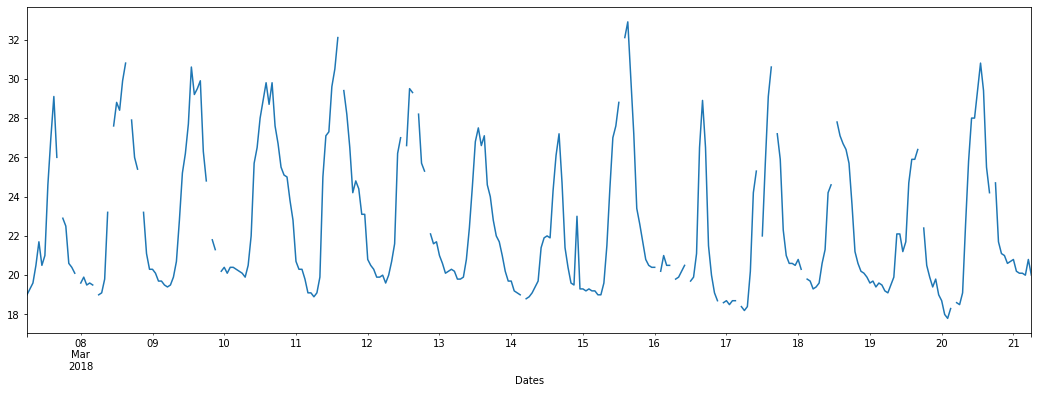

In [ ]:
df2018=df.loc[(df.index >= '2018/03/07 06:00') & (df.index <= '2018/03/21 06:00')]
plot18= df2018['Temperatura']
ax3 = plot18.plot(figsize=(18, 6))

In [ ]:
dfFill = df2018.fillna(method='ffill')
dfLinear = df2018.interpolate(method='linear')
dfPol = df2018.interpolate(method='polynomial',order=3)

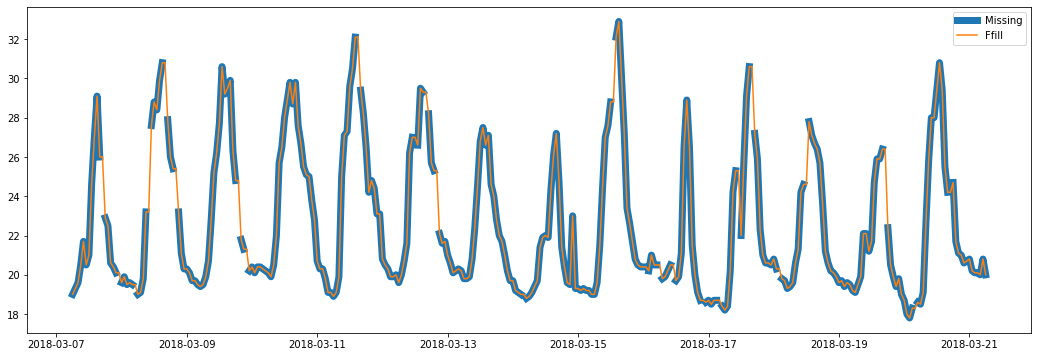

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df2018.index, df2018['Temperatura'], label = "Missing", linewidth=7.0)
plt.plot(dfFill.index, dfFill['Temperatura'], label = "Ffill")
plt.legend()
plt.show()

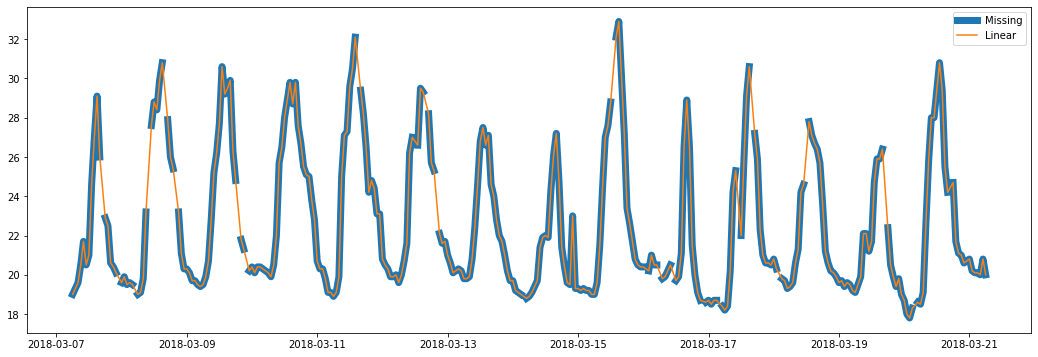

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df2018.index, df2018['Temperatura'], label = "Missing", linewidth=7.0)
plt.plot(dfLinear.index, dfLinear['Temperatura'], label = "Linear")
plt.legend()
plt.show()

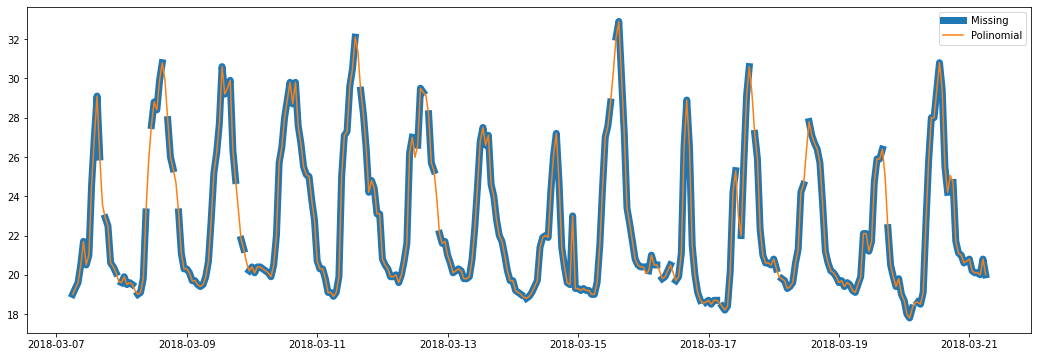

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df2018.index, df2018['Temperatura'], label = "Missing", linewidth=7.0)
plt.plot(dfPol.index, dfPol['Temperatura'], label = "Polinomial")
plt.legend()
plt.show()

In [ ]:
df= df.interpolate(method='linear')

In [ ]:
mean_d=df.loc[(df.index >= '2018/03/04 00:00') & (df.index <= '2022/12/25 23:00')]

In [ ]:
#mean_w = mean_w.resample('D').max()
weather=mean_d.resample('D')['Temperatura','Humedad','Direccion_Viento','Velocidad_Viento'].agg(['min', 'max','mean'])

In [ ]:
rain=mean_d.resample('D')['Precipitacion'].agg(['sum'])

In [ ]:
weather['Precipitacion']=rain['sum'].values

In [ ]:
mean_w= weather.resample('W').mean()
mean_w

Temperatura                          Humedad              \
                   min        max       mean        min         max   
Dates                                                                 
2018-03-04   19.800000  32.400000  25.118750  46.000000  100.000000   
2018-03-11   18.871429  29.971429  22.912202  53.857143  100.000000   
2018-03-18   19.028571  29.200000  22.278274  61.142857  100.000000   
2018-03-25   18.200000  27.857143  21.688690  58.571429   99.142857   
2018-04-01   17.714286  26.900000  20.984226  52.857143   96.285714   
...                ...        ...        ...        ...         ...   
2022-11-27   19.414286  31.457143  24.419048  34.571429   88.000000   
2022-12-04   20.492857  32.742857  25.691964  30.857143   78.142857   
2022-12-11   17.257143  30.528571  22.044643  38.142857   92.142857   
2022-12-18   18.314286  28.385714  22.035119  48.428571   94.285714   
2022-12-25   18.785714  29.057143  23.135119  47.857143   93.857143   

                      Direccion_Viento                          \
                 mean              min         max        mean   
Dates                                                            
2018-03-04  78.395833        53.000000  323.000000  173.125000   
2018-03-11  84.520833        18.428571  346.428571  196.654762   
2018-03-18  89.916667        14.857143  344.428571  192.321429   
2018-03-25  87.294643        21.571429  344.285714  201.214286   
2018-04-01  80.735119        33.142857  339.285714  216.357143   
...               ...              ...         ...         ...   
2022-11-27  62.672619        23.142857  331.142857  125.630952   
2022-12-04  54.800595        28.571429  282.714286  101.380952   
2022-12-11  71.672619        29.571429  310.571429  147.755952   
2022-12-18  76.672619        12.428571  317.714286  138.723214   
2022-12-25  72.297619        24.285714  329.428571  140.125000   

           Velocidad_Viento                     Precipitacion  
                        min       max      mean                
Dates                                                          
2018-03-04              0.0  1.900000  0.441667      0.300000  
2018-03-11              0.0  3.342857  0.627679      7.028571  
2018-03-18              0.0  2.414286  0.363988     11.664286  
2018-03-25              0.0  2.071429  0.250893     10.542857  
2018-04-01              0.0  0.000000  0.000000      3.250000  
...                     ...       ...       ...           ...  
2022-11-27              0.0  3.400000  0.989583      5.085714  
2022-12-04              0.0  5.257143  1.682143      0.000000  
2022-12-11              0.0  2.428571  0.440476      7.800000  
2022-12-18              0.0  3.157143  0.608036      2.971429  
2022-12-25              0.0  3.842857  0.775000      5.485714  

[252 rows x 13 columns]

In [ ]:
weather=pd.concat([weather2017,mean_w], axis=0)
weather

Temperatura                                   Humedad             \
                   min        max                mean        min        max   
2017-01-01        17.6       31.0                24.3       72.9       72.9   
2017-01-08        17.5       24.6  22.200000000000003       74.2       85.0   
2017-01-15        16.6       23.6                20.8       71.7       89.3   
2017-01-22        17.2       24.8  21.200000000000003       69.2       86.6   
2017-01-29        18.0       28.6  23.700000000000003       68.9       81.8   
...                ...        ...                 ...        ...        ...   
2022-11-27   19.414286  31.457143           24.419048  34.571429       88.0   
2022-12-04   20.492857  32.742857           25.691964  30.857143  78.142857   
2022-12-11   17.257143  30.528571           22.044643  38.142857  92.142857   
2022-12-18   18.314286  28.385714           22.035119  48.428571  94.285714   
2022-12-25   18.785714  29.057143           23.135119  47.857143  93.857143   

                                 Direccion_Viento                      \
                         mean                 min                 max   
2017-01-01               72.9                53.0               323.0   
2017-01-08  79.89999999999999  18.428571428571427  346.42857142857144   
2017-01-15               80.2  14.857142857142858  344.42857142857144   
2017-01-22  75.75714285714285  21.571428571428573   344.2857142857143   
2017-01-29  75.84285714285714  33.142857142857146   339.2857142857143   
...                       ...                 ...                 ...   
2022-11-27          62.672619           23.142857          331.142857   
2022-12-04          54.800595           28.571429          282.714286   
2022-12-11          71.672619           29.571429          310.571429   
2022-12-18          76.672619           12.428571          317.714286   
2022-12-25          72.297619           24.285714          329.428571   

                               Velocidad_Viento                      \
                          mean              min                 max   
2017-01-01             173.125              0.0                 1.9   
2017-01-08   196.6547619047619              0.0  3.3428571428571425   
2017-01-15  192.32142857142858              0.0   2.414285714285714   
2017-01-22  201.21428571428572              0.0  2.0714285714285716   
2017-01-29  216.35714285714286              0.0                 0.0   
...                        ...              ...                 ...   
2022-11-27          125.630952              0.0                 3.4   
2022-12-04          101.380952              0.0            5.257143   
2022-12-11          147.755952              0.0            2.428571   
2022-12-18          138.723214              0.0            3.157143   
2022-12-25             140.125              0.0            3.842857   

                                Precipitacion  
                           mean                
2017-01-01  0.44166666666666665      0.800000  
2017-01-08   0.6276785714285714      5.585714  
2017-01-15   0.3639880952380952      7.885714  
2017-01-22  0.25089285714285714      2.585714  
2017-01-29                  0.0      7.742857  
...                         ...           ...  
2022-11-27             0.989583      5.085714  
2022-12-04             1.682143      0.000000  
2022-12-11             0.440476      7.800000  
2022-12-18             0.608036      2.971429  
2022-12-25                0.775      5.485714  

[313 rows x 13 columns]

# LEISHMANIASIS

In [ ]:
#!gdown --id 1JyXFBVxC5GnPK3H46HJow48Zk9wtucqe

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JyXFBVxC5GnPK3H46HJow48Zk9wtucqe
To: /content/Leishmaniasis - Copia de dengue (3).csv
100% 8.37k/8.37k [00:00<00:00, 12.5MB/s]


In [ ]:
#!gdown --id 1dVH5yhuJbfHb4Da3MDXnrmNTqMaumoDG

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dVH5yhuJbfHb4Da3MDXnrmNTqMaumoDG
To: /content/Leishmaniasis - Copia de dengue (4).csv
100% 8.70k/8.70k [00:00<00:00, 10.7MB/s]


In [ ]:
!gdown --id 1uQBqlFjLKQ87wCqCC45y8XNtKUcAVfG_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uQBqlFjLKQ87wCqCC45y8XNtKUcAVfG_
To: /content/Copia de Leishmaniasis - Copia de dengue.csv
100% 8.77k/8.77k [00:00<00:00, 34.3MB/s]


In [ ]:
#leish=pd.read_csv('/content/Leishmaniasis - Copia de dengue (4).csv')


In [ ]:
#leish=pd.read_csv('/content/Leishmaniasis - Copia de dengue (3).csv')


In [ ]:
leish=pd.read_csv('/content/Copia de Leishmaniasis - Copia de dengue.csv')

In [ ]:
leish=leish[['Unnamed: 1','casos','incidencia100k']]
leish

,Unnamed: 1,casos,incidencia100k
0,SE201701,16.0,8.7962
1,SE201702,9.0,4.9479
2,SE201703,9.0,4.9479
3,SE201704,16.0,8.7962
4,SE201705,13.0,7.1469
...,...,...,...
308,SE202248,10.0,5.9387
309,SE202249,0.0,0.0000
310,SE202250,17.0,10.0957
311,SE202251,8.0,4.7509


In [ ]:
leishtest=leish.loc[(leish['Unnamed: 1'] > 'SE202152')]
leish=leish.loc[(leish['Unnamed: 1'] < 'SE202201')]

In [ ]:
leish.isna().sum()

Unnamed: 1         0
casos             17
incidencia100k     0
dtype: int64

In [ ]:
weather

In [ ]:
weathertest=weather.loc[(weather.index > '2021-12-26')]
weather=weather.loc[(weather.index < '2021-12-27')]

In [ ]:
weather['casos']=leish['casos'].values

<ipython-input-25-f72fa463da8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['casos']=leish['casos'].values


In [ ]:
weathertest['casos']=leishtest['casos'].values

<ipython-input-26-e69139e6426f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weathertest['casos']=leishtest['casos'].values


In [ ]:
weathertest

In [ ]:
weather=weather.dropna()
weather

Temperatura                                   Humedad             \
                   min        max                mean        min        max   
2017-01-01        17.6       31.0                24.3       72.9       72.9   
2017-01-08        17.5       24.6  22.200000000000003       74.2       85.0   
2017-01-15        16.6       23.6                20.8       71.7       89.3   
2017-01-22        17.2       24.8  21.200000000000003       69.2       86.6   
2017-01-29        18.0       28.6  23.700000000000003       68.9       81.8   
...                ...        ...                 ...        ...        ...   
2021-11-28        18.4  28.571429           22.039286  54.857143       98.0   
2021-12-05   17.957143  27.485714           21.151786       57.0  98.428571   
2021-12-12   18.871429       28.8           22.172024  54.714286  98.571429   
2021-12-19   18.514286  30.785714           23.096429  44.571429       97.0   
2021-12-26   18.614286  30.314286           23.073214  47.571429  95.857143   

                                 Direccion_Viento                      \
                         mean                 min                 max   
2017-01-01               72.9                53.0               323.0   
2017-01-08  79.89999999999999  18.428571428571427  346.42857142857144   
2017-01-15               80.2  14.857142857142858  344.42857142857144   
2017-01-22  75.75714285714285  21.571428571428573   344.2857142857143   
2017-01-29  75.84285714285714  33.142857142857146   339.2857142857143   
...                       ...                 ...                 ...   
2021-11-28          82.380952           16.857143          344.571429   
2021-12-05           86.14881            7.428571          347.857143   
2021-12-12          84.190476           14.428571          327.571429   
2021-12-19          76.029762           17.142857          338.142857   
2021-12-26           75.60119           13.714286          332.857143   

                               Velocidad_Viento                      \
                          mean              min                 max   
2017-01-01             173.125              0.0                 1.9   
2017-01-08   196.6547619047619              0.0  3.3428571428571425   
2017-01-15  192.32142857142858              0.0   2.414285714285714   
2017-01-22  201.21428571428572              0.0  2.0714285714285716   
2017-01-29  216.35714285714286              0.0                 0.0   
...                        ...              ...                 ...   
2021-11-28          154.791667              0.0            2.257143   
2021-12-05          157.232143              0.0            2.142857   
2021-12-12          170.470238              0.0            2.528571   
2021-12-19           142.10119              0.0            3.157143   
2021-12-26          142.380952              0.0            3.314286   

                                Precipitacion casos  
                           mean                      
2017-01-01  0.44166666666666665      0.800000  16.0  
2017-01-08   0.6276785714285714      5.585714   9.0  
2017-01-15   0.3639880952380952      7.885714   9.0  
2017-01-22  0.25089285714285714      2.585714  16.0  
2017-01-29                  0.0      7.742857  13.0  
...                         ...           ...   ...  
2021-11-28             0.434524      8.342857  15.0  
2021-12-05             0.354762      0.000000   7.0  
2021-12-12              0.46369      0.000000  16.0  
2021-12-19             0.696429      0.000000  11.0  
2021-12-26             0.714881      0.000000  15.0  

[244 rows x 14 columns]

In [ ]:
weather2=weather[weather['casos']!=0]
weather2

Temperatura                                   Humedad             \
                   min        max                mean        min        max   
2017-01-01        17.6       31.0                24.3       72.9       72.9   
2017-01-08        17.5       24.6  22.200000000000003       74.2       85.0   
2017-01-15        16.6       23.6                20.8       71.7       89.3   
2017-01-22        17.2       24.8  21.200000000000003       69.2       86.6   
2017-01-29        18.0       28.6  23.700000000000003       68.9       81.8   
...                ...        ...                 ...        ...        ...   
2021-11-28        18.4  28.571429           22.039286  54.857143       98.0   
2021-12-05   17.957143  27.485714           21.151786       57.0  98.428571   
2021-12-12   18.871429       28.8           22.172024  54.714286  98.571429   
2021-12-19   18.514286  30.785714           23.096429  44.571429       97.0   
2021-12-26   18.614286  30.314286           23.073214  47.571429  95.857143   

                                 Direccion_Viento                      \
                         mean                 min                 max   
2017-01-01               72.9                53.0               323.0   
2017-01-08  79.89999999999999  18.428571428571427  346.42857142857144   
2017-01-15               80.2  14.857142857142858  344.42857142857144   
2017-01-22  75.75714285714285  21.571428571428573   344.2857142857143   
2017-01-29  75.84285714285714  33.142857142857146   339.2857142857143   
...                       ...                 ...                 ...   
2021-11-28          82.380952           16.857143          344.571429   
2021-12-05           86.14881            7.428571          347.857143   
2021-12-12          84.190476           14.428571          327.571429   
2021-12-19          76.029762           17.142857          338.142857   
2021-12-26           75.60119           13.714286          332.857143   

                               Velocidad_Viento                      \
                          mean              min                 max   
2017-01-01             173.125              0.0                 1.9   
2017-01-08   196.6547619047619              0.0  3.3428571428571425   
2017-01-15  192.32142857142858              0.0   2.414285714285714   
2017-01-22  201.21428571428572              0.0  2.0714285714285716   
2017-01-29  216.35714285714286              0.0                 0.0   
...                        ...              ...                 ...   
2021-11-28          154.791667              0.0            2.257143   
2021-12-05          157.232143              0.0            2.142857   
2021-12-12          170.470238              0.0            2.528571   
2021-12-19           142.10119              0.0            3.157143   
2021-12-26          142.380952              0.0            3.314286   

                                Precipitacion casos  
                           mean                      
2017-01-01  0.44166666666666665      0.800000  16.0  
2017-01-08   0.6276785714285714      5.585714   9.0  
2017-01-15   0.3639880952380952      7.885714   9.0  
2017-01-22  0.25089285714285714      2.585714  16.0  
2017-01-29                  0.0      7.742857  13.0  
...                         ...           ...   ...  
2021-11-28             0.434524      8.342857  15.0  
2021-12-05             0.354762      0.000000   7.0  
2021-12-12              0.46369      0.000000  16.0  
2021-12-19             0.696429      0.000000  11.0  
2021-12-26             0.714881      0.000000  15.0  

[233 rows x 14 columns]

In [ ]:
elcsv=weather.to_csv('weather.csv',index=False)

In [ ]:
elcsv=weather2.to_csv('weather>8.csv',index=False)

In [ ]:
weather2.describe()

<ipython-input-31-e5c4a164c376>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather.corr()


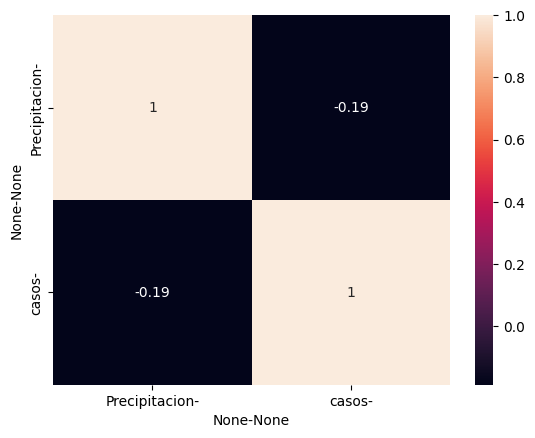

In [ ]:
corr_matrix = weather.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#SYNTHETIC DATA

In [ ]:
%pip install sdv==1.0.0


In [ ]:
import pandas as pd

data = pd.read_csv('/content/weather.csv')

In [ ]:
data= data.drop(labels=[0], axis=0)

In [ ]:
from sdv.datasets.local import load_csvs

# assume that my_folder contains 1 CSV file named 'guests.csv'
datasets = load_csvs('/content/')

# the data is available under the file name
guests_table = datasets['weather']

In [ ]:
guests_table = guests_table.drop(labels=[0], axis=0)

In [ ]:
guests_table

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=guests_table)


In [ ]:
metadata.update_column(column_name='Temperatura',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Temperatura.1',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Temperatura.2',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Humedad',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Humedad.1',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Humedad.2',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Direccion_Viento',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Direccion_Viento.1',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Direccion_Viento.2',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Velocidad_Viento',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Velocidad_Viento.1',sdtype='numerical',computer_representation='Float')
metadata.update_column(column_name='Velocidad_Viento.2',sdtype='numerical',computer_representation='Float')

In [ ]:
python_dict = metadata.to_dict()
metadata.validate()

In [ ]:
metadata.save_to_json(filepath='my_metadata_v5.json')

In [ ]:
data = data.astype({'Temperatura':'float','Temperatura.1':'float','Temperatura.2':'float','Humedad':'float','Humedad.1':'float'
,'Humedad.2':'float','Direccion_Viento':'float','Direccion_Viento.1':'float','Direccion_Viento.2':'float','Velocidad_Viento':'float'
,'Velocidad_Viento.1':'float','Velocidad_Viento.2':'float'})

In [ ]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 1 to 233
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         233 non-null    float64
 1   Temperatura.1       233 non-null    float64
 2   Temperatura.2       233 non-null    float64
 3   Humedad             233 non-null    float64
 4   Humedad.1           233 non-null    float64
 5   Humedad.2           233 non-null    float64
 6   Direccion_Viento    233 non-null    float64
 7   Direccion_Viento.1  233 non-null    float64
 8   Direccion_Viento.2  233 non-null    float64
 9   Velocidad_Viento    233 non-null    float64
 10  Velocidad_Viento.1  233 non-null    float64
 11  Velocidad_Viento.2  233 non-null    float64
 12  Precipitacion       233 non-null    float64
 13  casos               233 non-null    float64
dtypes: float64(14)
memory usage: 25.6 KB


In [ ]:
synthesizer.fit(data=data)
synthetic_data = synthesizer.sample(num_rows=4500)
synthetic_data.head()

,Temperatura,Temperatura.1,Temperatura.2,Humedad,Humedad.1,Humedad.2,Direccion_Viento,Direccion_Viento.1,Direccion_Viento.2,Velocidad_Viento,Velocidad_Viento.1,Velocidad_Viento.2,Precipitacion,casos
0,20.376430,30.105007,23.625416,46.257106,84.266246,69.783908,41.675442,331.757186,216.499815,0.210295,3.574864,1.091232,1.435057,12.613433
1,17.674388,27.990495,21.814005,53.829431,95.514795,80.909316,7.741792,334.147746,201.830863,0.159575,3.376071,0.683577,6.278236,11.293058
2,15.834991,30.497682,22.778566,52.714847,86.298473,69.404745,8.746923,348.336896,215.934999,0.000000,5.946146,1.308229,3.158090,4.803252
3,18.444659,26.401775,22.715819,66.698052,88.345998,79.264166,47.568742,340.752438,231.481721,0.137125,3.567009,0.859854,5.536072,15.128851
4,14.225499,26.751127,19.852861,40.628943,90.815179,67.233933,29.572585,352.428571,243.287022,0.000000,1.778722,0.336718,1.190492,12.459762


In [ ]:
synthetic_data = synthetic_data.astype({'casos':'int'})

In [ ]:
synthetic_dataC=synthetic_data
synthetic_data=synthetic_data.drop(columns=['casos'])

In [ ]:
columns=[('Temperatura','min'),('Temperatura','max'),('Temperatura','mean'),('Humedad','min'),('Humedad','max'),
('Humedad','mean'),('Direccion_Viento','min'),('Direccion_Viento','max'),('Direccion_Viento','mean')
,('Velocidad_Viento','min'),('Velocidad_Viento','max'),('Velocidad_Viento','mean'),
('Precipitacion','')]
synthetic_data.columns=pd.MultiIndex.from_tuples(columns)
synthetic_data

Temperatura                          Humedad                        \
             min        max       mean        min        max       mean   
0      20.376430  30.105007  23.625416  46.257106  84.266246  69.783908   
1      17.674388  27.990495  21.814005  53.829431  95.514795  80.909316   
2      15.834991  30.497682  22.778566  52.714847  86.298473  69.404745   
3      18.444659  26.401775  22.715819  66.698052  88.345998  79.264166   
4      14.225499  26.751127  19.852861  40.628943  90.815179  67.233933   
...          ...        ...        ...        ...        ...        ...   
4495   16.724351  29.894459  22.464023  40.565800  87.861677  66.128991   
4496   22.021584  31.803943  24.401025  31.178603  98.418971  72.164555   
4497   18.010223  26.300209  22.462367  64.697747  86.489601  79.604375   
4498   15.804221  29.040244  21.365562  42.919208  90.416419  69.868065   
4499   17.515299  29.860402  23.145631  40.166589  87.530337  64.055406   

     Direccion_Viento                         Velocidad_Viento            \
                  min         max        mean              min       max   
0           41.675442  331.757186  216.499815         0.210295  3.574864   
1            7.741792  334.147746  201.830863         0.159575  3.376071   
2            8.746923  348.336896  215.934999         0.000000  5.946146   
3           47.568742  340.752438  231.481721         0.137125  3.567009   
4           29.572585  352.428571  243.287022         0.000000  1.778722   
...               ...         ...         ...              ...       ...   
4495        38.060513  339.912208  240.914788         0.000000  5.733664   
4496        56.477168  325.925566  189.873671         0.200037  5.784838   
4497        63.386818  336.594053  229.534096         0.162978  5.734783   
4498        36.866859  345.432266  189.137796         0.000000  4.393965   
4499        36.049050  320.107256  216.397211         0.035653  6.158462   

               Precipitacion  
          mean                
0     1.091232      1.435057  
1     0.683577      6.278236  
2     1.308229      3.158090  
3     0.859854      5.536072  
4     0.336718      1.190492  
...        ...           ...  
4495  1.231546      0.000000  
4496  1.552865      6.422359  
4497  1.372704      6.812358  
4498  0.785002      0.000000  
4499  1.474817      2.100312  

[4500 rows x 13 columns]

In [ ]:
synthetic_data['casos']=synthetic_dataC['casos'].values

In [ ]:
'''from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    column_name='casos',
    metadata=metadata
)

fig.show()'''

In [ ]:
weather

In [ ]:
test=pd.concat([synthetic_data,weather2])
test

Temperatura                          Humedad             \
                            min        max       mean        min        max   
0                      20.37643  30.105007  23.625416  46.257106  84.266246   
1                     17.674388  27.990495  21.814005  53.829431  95.514795   
2                     15.834991  30.497682  22.778566  52.714847  86.298473   
3                     18.444659  26.401775  22.715819  66.698052  88.345998   
4                     14.225499  26.751127  19.852861  40.628943  90.815179   
...                         ...        ...        ...        ...        ...   
2021-11-28 00:00:00        18.4  28.571429  22.039286  54.857143       98.0   
2021-12-05 00:00:00   17.957143  27.485714  21.151786       57.0  98.428571   
2021-12-12 00:00:00   18.871429       28.8  22.172024  54.714286  98.571429   
2021-12-19 00:00:00   18.514286  30.785714  23.096429  44.571429       97.0   
2021-12-26 00:00:00   18.614286  30.314286  23.073214  47.571429  95.857143   

                               Direccion_Viento                          \
                          mean              min         max        mean   
0                    69.783908        41.675442  331.757186  216.499815   
1                    80.909316         7.741792  334.147746  201.830863   
2                    69.404745         8.746923  348.336896  215.934999   
3                    79.264166        47.568742  340.752438  231.481721   
4                    67.233933        29.572585  352.428571  243.287022   
...                        ...              ...         ...         ...   
2021-11-28 00:00:00  82.380952        16.857143  344.571429  154.791667   
2021-12-05 00:00:00   86.14881         7.428571  347.857143  157.232143   
2021-12-12 00:00:00  84.190476        14.428571  327.571429  170.470238   
2021-12-19 00:00:00  76.029762        17.142857  338.142857   142.10119   
2021-12-26 00:00:00   75.60119        13.714286  332.857143  142.380952   

                    Velocidad_Viento                     Precipitacion casos  
                                 min       max      mean                      
0                           0.210295  3.574864  1.091232      1.435057  12.0  
1                           0.159575  3.376071  0.683577      6.278236  11.0  
2                                0.0  5.946146  1.308229      3.158090   4.0  
3                           0.137125  3.567009  0.859854      5.536072  15.0  
4                                0.0  1.778722  0.336718      1.190492  12.0  
...                              ...       ...       ...           ...   ...  
2021-11-28 00:00:00              0.0  2.257143  0.434524      8.342857  15.0  
2021-12-05 00:00:00              0.0  2.142857  0.354762      0.000000   7.0  
2021-12-12 00:00:00              0.0  2.528571   0.46369      0.000000  16.0  
2021-12-19 00:00:00              0.0  3.157143  0.696429      0.000000  11.0  
2021-12-26 00:00:00              0.0  3.314286  0.714881      0.000000  15.0  

[4733 rows x 14 columns]

In [ ]:
test2= test[test['casos'] > 5]
test2

Temperatura                          Humedad             \
                            min        max       mean        min        max   
0                      20.37643  30.105007  23.625416  46.257106  84.266246   
1                     17.674388  27.990495  21.814005  53.829431  95.514795   
3                     18.444659  26.401775  22.715819  66.698052  88.345998   
4                     14.225499  26.751127  19.852861  40.628943  90.815179   
6                     17.892302  26.637036  20.939743  66.598947  96.404152   
...                         ...        ...        ...        ...        ...   
2021-11-28 00:00:00        18.4  28.571429  22.039286  54.857143       98.0   
2021-12-05 00:00:00   17.957143  27.485714  21.151786       57.0  98.428571   
2021-12-12 00:00:00   18.871429       28.8  22.172024  54.714286  98.571429   
2021-12-19 00:00:00   18.514286  30.785714  23.096429  44.571429       97.0   
2021-12-26 00:00:00   18.614286  30.314286  23.073214  47.571429  95.857143   

                               Direccion_Viento                          \
                          mean              min         max        mean   
0                    69.783908        41.675442  331.757186  216.499815   
1                    80.909316         7.741792  334.147746  201.830863   
3                    79.264166        47.568742  340.752438  231.481721   
4                    67.233933        29.572585  352.428571  243.287022   
6                    87.294643        14.077814  346.146816  203.828083   
...                        ...              ...         ...         ...   
2021-11-28 00:00:00  82.380952        16.857143  344.571429  154.791667   
2021-12-05 00:00:00   86.14881         7.428571  347.857143  157.232143   
2021-12-12 00:00:00  84.190476        14.428571  327.571429  170.470238   
2021-12-19 00:00:00  76.029762        17.142857  338.142857   142.10119   
2021-12-26 00:00:00   75.60119        13.714286  332.857143  142.380952   

                    Velocidad_Viento                     Precipitacion casos  
                                 min       max      mean                      
0                           0.210295  3.574864  1.091232      1.435057  12.0  
1                           0.159575  3.376071  0.683577      6.278236  11.0  
3                           0.137125  3.567009  0.859854      5.536072  15.0  
4                                0.0  1.778722  0.336718      1.190492  12.0  
6                                0.0  4.243064  0.600618      7.037480   7.0  
...                              ...       ...       ...           ...   ...  
2021-11-28 00:00:00              0.0  2.257143  0.434524      8.342857  15.0  
2021-12-05 00:00:00              0.0  2.142857  0.354762      0.000000   7.0  
2021-12-12 00:00:00              0.0  2.528571   0.46369      0.000000  16.0  
2021-12-19 00:00:00              0.0  3.157143  0.696429      0.000000  11.0  
2021-12-26 00:00:00              0.0  3.314286  0.714881      0.000000  15.0  

[3587 rows x 14 columns]

In [ ]:
test2= test[test['casos'] > 9]
test2

Temperatura                          Humedad             \
                            min        max       mean        min        max   
0                     18.579012  28.430383  23.654062   47.36165  85.111945   
1                     18.478611  24.799577  21.255487  57.497593  93.666991   
2                     13.815557  29.028438  21.262434  37.698947  85.516092   
3                     17.564533  24.666116  21.391121  69.344577  85.359692   
4                     15.521007  28.367362  21.404852  54.009129  86.950862   
...                         ...        ...        ...        ...        ...   
2021-10-31 00:00:00   18.085714  32.414286  23.605655  34.285714  93.714286   
2021-11-28 00:00:00        18.4  28.571429  22.039286  54.857143       98.0   
2021-12-12 00:00:00   18.871429       28.8  22.172024  54.714286  98.571429   
2021-12-19 00:00:00   18.514286  30.785714  23.096429  44.571429       97.0   
2021-12-26 00:00:00   18.614286  30.314286  23.073214  47.571429  95.857143   

                               Direccion_Viento                          \
                          mean              min         max        mean   
0                    65.053415        62.537089  320.831471   204.22046   
1                    75.063087          18.0757  335.298904  174.074216   
2                    64.335109        24.803035  333.094892  184.258027   
3                    77.600641        61.162449  333.739852  226.431535   
4                    71.900532              7.0  352.428571   232.84835   
...                        ...              ...         ...         ...   
2021-10-31 00:00:00  67.940476        20.714286       314.0  123.440476   
2021-11-28 00:00:00  82.380952        16.857143  344.571429  154.791667   
2021-12-12 00:00:00  84.190476        14.428571  327.571429  170.470238   
2021-12-19 00:00:00  76.029762        17.142857  338.142857   142.10119   
2021-12-26 00:00:00   75.60119        13.714286  332.857143  142.380952   

                    Velocidad_Viento                     Precipitacion casos  
                                 min       max      mean                      
0                             0.3767  2.789774  1.111223      0.392669  15.0  
1                           0.081209  2.855926  0.718021      3.440184  13.0  
2                                0.0  5.891859  1.208536      2.399576  11.0  
3                           0.204309  2.998927  1.001461      2.691758  16.0  
4                                0.0  2.387826  0.328795      0.000000  14.0  
...                              ...       ...       ...           ...   ...  
2021-10-31 00:00:00              0.0  4.071429  1.067262      0.000000  10.0  
2021-11-28 00:00:00              0.0  2.257143  0.434524      8.342857  15.0  
2021-12-12 00:00:00              0.0  2.528571   0.46369      0.000000  16.0  
2021-12-19 00:00:00              0.0  3.157143  0.696429      0.000000  11.0  
2021-12-26 00:00:00              0.0  3.314286  0.714881      0.000000  15.0  

[8427 rows x 14 columns]

In [ ]:
kdata=test2.to_csv('10kdatav2.csv',index=False)

<Axes: xlabel='casos'>

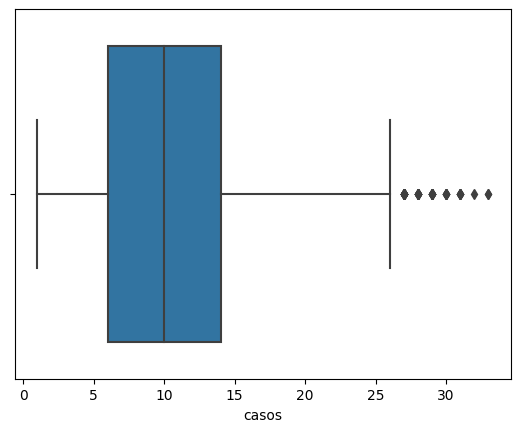

In [ ]:
import seaborn as sns
sns.boxplot(x=test2['casos'])

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

#OPTIMIZATIOn

In [ ]:
tenkdata=pd.read_csv('/content/10kdata.csv')
tenkdata=tenkdata.drop(labels=[0], axis=0)
tenkdata

,Temperatura,Temperatura.1,Temperatura.2,Humedad,Humedad.1,Humedad.2,Direccion_Viento,Direccion_Viento.1,Direccion_Viento.2,Velocidad_Viento,Velocidad_Viento.1,Velocidad_Viento.2,Precipitacion,casos
1,20.188489820513418,29.969285832274707,23.41930360970896,43.00860363251689,84.39295565813889,68.02107254321632,45.56206515415653,331.06399693281656,218.41665889210103,0.19316387981603475,3.410504637628587,1.0511296760419773,2.909348,13.0
2,18.742580184523234,25.659901591741853,21.802814466739672,52.33884872042481,94.72737111387084,75.71831541887417,11.844387554974595,336.7095309716221,181.83677758682077,0.06418195453758098,3.6953588165200526,0.7212792876120637,5.949230,10.0
3,18.719556617029234,25.883702603226315,22.71630074601512,66.77133469049336,88.31875075168314,78.51221264238049,47.6438223045503,340.91274894324334,226.72216221873913,0.11738510671056945,3.701896550435566,0.8794833598246075,5.628600,14.0
4,15.09294967469229,26.45656736030589,20.332109613469108,52.028034552675926,91.5297518041575,73.93136361523452,18.31110241882544,352.42857142857144,233.7301748067336,0.0,2.804801768340284,0.5440714035990579,0.000000,9.0
5,17.904251395352425,25.949626807339435,20.711661468099873,60.779254658444266,96.0602146093029,84.31119842018965,21.510348409411947,344.2803420983263,200.8241389745606,0.0,3.984292543089704,0.5464556953888671,10.465438,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,18.400000000000002,28.571428571428573,22.039285714285715,54.857142857142854,98.0,82.38095238095238,16.857142857142858,344.57142857142856,154.79166666666669,0.0,2.257142857142857,0.4345238095238095,8.342857,15.0
7763,17.95714285714286,27.485714285714288,21.151785714285715,57.0,98.42857142857143,86.14880952380952,7.428571428571429,347.85714285714283,157.23214285714286,0.0,2.142857142857143,0.3547619047619048,0.000000,7.0
7764,18.87142857142857,28.8,22.172023809523807,54.714285714285715,98.57142857142857,84.19047619047619,14.428571428571429,327.57142857142856,170.47023809523807,0.0,2.5285714285714285,0.4636904761904762,0.000000,16.0
7765,18.514285714285712,30.785714285714285,23.096428571428568,44.57142857142857,97.0,76.02976190476191,17.142857142857142,338.14285714285717,142.10119047619045,0.0,3.1571428571428575,0.6964285714285714,0.000000,11.0


In [ ]:
tenkdata['Temperatura']= tenkdata['Temperatura'].astype(float)
tenkdata['Temperatura.1']= tenkdata['Temperatura.1'].astype(float)
tenkdata['Temperatura.2']= tenkdata['Temperatura.2'].astype(float)
tenkdata['Humedad']= tenkdata['Humedad'].astype(float)
tenkdata['Humedad.1']= tenkdata['Humedad.1'].astype(float)
tenkdata['Humedad.2']= tenkdata['Humedad.2'].astype(float)
tenkdata['Direccion_Viento']= tenkdata['Direccion_Viento'].astype(float)
tenkdata['Direccion_Viento.1']= tenkdata['Direccion_Viento.1'].astype(float)
tenkdata['Direccion_Viento.2']= tenkdata['Direccion_Viento.2'].astype(float)
tenkdata['Velocidad_Viento']= tenkdata['Velocidad_Viento'].astype(float)
tenkdata['Velocidad_Viento.1']= tenkdata['Velocidad_Viento.1'].astype(float)
tenkdata['Velocidad_Viento.2']= tenkdata['Velocidad_Viento.2'].astype(float)

In [ ]:
tenkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 1 to 7766
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         7766 non-null   float64
 1   Temperatura.1       7766 non-null   float64
 2   Temperatura.2       7766 non-null   float64
 3   Humedad             7766 non-null   float64
 4   Humedad.1           7766 non-null   float64
 5   Humedad.2           7766 non-null   float64
 6   Direccion_Viento    7766 non-null   float64
 7   Direccion_Viento.1  7766 non-null   float64
 8   Direccion_Viento.2  7766 non-null   float64
 9   Velocidad_Viento    7766 non-null   float64
 10  Velocidad_Viento.1  7766 non-null   float64
 11  Velocidad_Viento.2  7766 non-null   float64
 12  Precipitacion       7766 non-null   float64
 13  casos               7766 non-null   float64
dtypes: float64(14)
memory usage: 849.5 KB


In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(tenkdata['casos'])
# Remove the labels from the features
# axis 1 refers to the columns
features= tenkdata.drop(['casos','Direccion_Viento','Direccion_Viento.1','Direccion_Viento.2','Velocidad_Viento','Velocidad_Viento.1','Velocidad_Viento.2'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
feature_list

['Temperatura',
 'Temperatura.1',
 'Temperatura.2',
 'Humedad',
 'Humedad.1',
 'Humedad.2',
 'Precipitacion']

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42,bootstrap=True, criterion='absolute_error', max_depth=65, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=400)
# Train the model on training data
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
rf.fit(features, labels)

RandomForestRegressor(criterion='absolute_error', max_depth=65,
                      max_features='sqrt', min_samples_leaf=2, n_estimators=400,
                      random_state=42)

In [ ]:
rf.fit(train_features, train_labels)

RandomForestRegressor(criterion='friedman_mse', max_features='log2',
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=775, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
criterion=['squared_error','absolute_error','friedman_mse']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [20, 42, 65, 87, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'squared_error',
                                                      'friedman_mse'],
                                        'max_depth': [20, 30, 40, 50, 60, 70,
                                                      80, 90, 100, 110, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 600, 900, 1200,
                                                         1500]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 90,
 'criterion': 'squared_error',
 'bootstrap': True}

In [ ]:
# Use the forest's predict method on the test data
predictions = rf_random.predict(weatherfeatures)
# Calculate the absolute errors
errors = abs(predictions - weathertarget)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
!pip install tpot


In [ ]:
from tpot import TPOTRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tpot_reg = TPOTRegressor(generations= 20, population_size= 20, offspring_size= 20,
                                 verbosity= 2, early_stop= 12,config_dict={'sklearn.ensemble.RandomForestRegressor': random_grid},
                                 cv = 3, scoring = 'neg_mean_squared_error',n_jobs = -1)



In [ ]:
train_features = np.array(list(train_features), dtype=np.float)
train_labels = np.array(list(train_labels), dtype=np.float)

<ipython-input-13-b417a1c08bad>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_features = np.array(list(train_features), dtype=np.float)
<ipython-input-13-b417a1c08bad>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_labels = np.array(list(train_labels), dtype=np.float)


In [ ]:
tpot_reg.fit(train_features, train_labels)

Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -18.468833048086793

Generation 2 - Current best internal CV score: -18.468833048086793

Generation 3 - Current best internal CV score: -18.468833048086793

Generation 4 - Current best internal CV score: -18.468833048086793

Generation 5 - Current best internal CV score: -18.468833048086793

Generation 6 - Current best internal CV score: -18.468833048086793

Generation 7 - Current best internal CV score: -18.468833048086793

Generation 8 - Current best internal CV score: -18.468833048086793

Generation 9 - Current best internal CV score: -18.460226269741398

Generation 10 - Current best internal CV score: -18.460226269741398

Generation 11 - Current best internal CV score: -18.460226269741398

Generation 12 - Current best internal CV score: -18.449696349986237

Generation 13 - Current best internal CV score: -18.433613930037605

Generation 14 - Current best internal CV score: -18.417315500371174

Generation 15 - Current best internal CV s

TPOTRegressor(config_dict={'sklearn.ensemble.RandomForestRegressor': {'criterion': ['squared_error',
                                                                                    'absolute_error',
                                                                                    'friedman_mse'],
                                                                      'max_depth': [20,
                                                                                    42,
                                                                                    65,
                                                                                    87,
                                                                                    110,
                                                                                    None],
                                                                      'max_features': ['auto',
                                                                                       'sqrt',
                                                                                       'log2'],
                                                                      'min_samples_leaf': [1,
                                                                                           2,
                                                                                           4],
                                                                      'min_samples_split': [2,
                                                                                            5,
                                                                                            10],
                                                                      'n_estimators': [100,
                                                                                       200,
                                                                                       300,
                                                                                       400,
                                                                                       500,
                                                                                       600,
                                                                                       700,
                                                                                       800,
                                                                                       900,
                                                                                       1000]}},
              cv=3, early_stop=12, generations=20, n_jobs=-1, offspring_size=20,
              population_size=20, scoring='neg_mean_squared_error',
              verbosity=2)

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    max_depth = trial.suggest_int('max_depth', 1, 110)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    n_estimators =  trial.suggest_int('n_estimators', 30, 1000)

    regr = RandomForestRegressor(bootstrap = bootstrap, criterion = criterion,
                                 max_depth = max_depth, max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,n_estimators = n_estimators,n_jobs=2)


    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)

    score = cross_val_score(regr, train_features, train_labels, cv=5, scoring="r2")
    r2_mean = score.mean()

    return r2_mean

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

In [ ]:
study.best_params

{'criterion': 'squared_error',
 'bootstrap': True,
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 3599,
 'n_estimators': 808}

In [ ]:
study.best_params

{'criterion': 'squared_error',
 'bootstrap': True,
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 425,
 'n_estimators': 175}

In [ ]:
pip install arm-mango

In [ ]:
def objective(list_parameters):
    global train_features, test_features, train_labels, test_labels

    results = []
    for hyper_params in list_parameters:
        model = RandomForestRegressor(**hyper_params)
        model.fit(train_features, train_labels)
        prediction = model.predict(test_features)
        #prediction = np.exp(prediction) - 1  # to get the real value not in log scale
        error = np.sqrt(mean_squared_error(test_labels, prediction))
        results.append(error)
    return results

In [ ]:
from mango import scheduler, Tuner
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# third step: run the optimisation through Tuner
#start_time = time.time()
tuner = Tuner(random_grid, objective, dict(num_iteration=40, initial_random=10))  # Initialize Tuner
optimisation_results = tuner.minimize()
#print(f'The optimisation in series takes {(time.time()-start_time)/60.} minutes.')

# Inspect the results
print('best parameters:', optimisation_results['best_params'])
print('best accuracy (RMSE):', optimisation_results['best_objective'])

  0%|          | 0/40 [00:00<?, ?it/s]

best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 1500}
best accuracy (RMSE): 4.223328109567203


In [ ]:
# run the model with the best hyper-parameters on the test set
best_model = RandomForestRegressor(n_jobs=-1, **optimisation_results['best_params'])
best_model.fit(train_features, train_labels)
y_pred = best_model.predict(weatherfeatures) - 1  # to get the real value not in log scale
print('rmse on test:', np.sqrt(mean_squared_error(weathertarget, y_pred)))

rmse on test: 3.0851241637351468


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42,criterion= 'squared_error',
 bootstrap= True,
 max_depth= 5,
 max_features= 'log2',
 max_leaf_nodes= 425,
 n_estimators= 175)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(max_depth=5, max_features='log2', max_leaf_nodes=425,
                      n_estimators=175, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state = 42)
grid_search=GridSearchCV(estimator=rf,param_grid=random_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(train_features,train_labels)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


In [ ]:
grid_search.best_estimator_

#RF

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(weather2['casos'])
# Remove the labels from the features
# axis 1 refers to the columns
features= weather2.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

<ipython-input-47-7081e6173f48>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features= weather2.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)


In [ ]:
feature_list

[('Temperatura', 'min'),
 ('Temperatura', 'max'),
 ('Temperatura', 'mean'),
 ('Humedad', 'min'),
 ('Humedad', 'max'),
 ('Humedad', 'mean'),
 ('Precipitacion', '')]

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(test['casos'])
# Remove the labels from the features
# axis 1 refers to the columns
features= test.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

<ipython-input-154-ef2d8145a4b7>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features= test.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)


In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(test2['casos'])
# Remove the labels from the features
# axis 1 refers to the columns
features= test2.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

<ipython-input-166-b8e0bf60f523>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features= test2.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)


In [ ]:
feature_list

[('Temperatura', 'min'),
 ('Temperatura', 'max'),
 ('Temperatura', 'mean'),
 ('Humedad', 'min'),
 ('Humedad', 'max'),
 ('Humedad', 'mean'),
 ('Precipitacion', '')]

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(synthetic_data['casos'])
# Remove the labels from the features
# axis 1 refers to the columns
features= synthetic_data.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

<ipython-input-166-3c7054a0629c>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features= synthetic_data.drop(['casos','Direccion_Viento','Velocidad_Viento'], axis = 1)


In [ ]:
feature_list

[('Temperatura', 'min'),
 ('Temperatura', 'max'),
 ('Temperatura', 'mean'),
 ('Humedad', 'min'),
 ('Humedad', 'max'),
 ('Humedad', 'mean'),
 ('Precipitacion', '')]

In [ ]:
features.shape

(8138, 7)

In [ ]:
featuresbr.shape

(364, 6)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(criterion='absolute_error', max_depth=65, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=400,
                           bootstrap=True, random_state = 42)
# Train the model on training data
rf.fit(features, labels)

RandomForestRegressor(criterion='absolute_error', max_depth=65,
                      max_features='sqrt', min_samples_leaf=2, n_estimators=400,
                      random_state=42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators= 700,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True, random_state = 42)
# Train the model on training data
rf.fit(features, labels)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=700, random_state=42)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(features, labels)

RandomForestRegressor(random_state=42)

In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
weathertestv2=weathertest[weathertest['casos']>5]

In [ ]:
weatherfeatures=weathertestv2[['Temperatura','Humedad','Precipitacion']]
weathertarget=weathertestv2['casos']

In [ ]:
weatherfeatures=weatherfeatures.to_numpy()
weathertarget=weathertarget.to_numpy()

In [ ]:
#weatherfeatures=weathertestv2.drop(['casos'],axis=1)
#weathertarget=weathertestv2['casos']

In [ ]:
weatherfeatures=weatherfeatures.to_numpy()
weathertarget=weathertarget.to_numpy()

In [ ]:
weathertestv2=pd.read_csv('/content/testset.csv')

In [ ]:
weathertestv2=weathertestv2.drop(labels=[0], axis=0)

In [ ]:
weathertestv2

In [ ]:
weathertestv2=weathertestv2[weathertestv2['casos']!=0]

In [ ]:
weatherfeatures=weathertestv2[['Temperatura','Temperatura.1','Temperatura.2','Humedad','Humedad.1','Humedad.2','Precipitacion']]
weathertarget=weathertestv2['casos']

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(weatherfeatures)
# Calculate the absolute errors
errors = abs(predictions - weathertarget)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3.15


In [ ]:
import math
MSE = np.square(np.subtract(weathertarget,predictions)).mean()

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

3.7181054173781627


In [ ]:
results = pd.DataFrame(zip(weathertarget, predictions, weathertarget - predictions), columns = ['Casos', 'Predicciones', 'error'])
results.head(10)

,Casos,Predicciones,error
0,14.0,11.70000,2.30000
1,9.0,9.54500,-0.54500
2,12.0,10.34625,1.65375
3,10.0,10.43875,-0.43875
4,13.0,10.62375,2.37625
5,10.0,10.86125,-0.86125
6,11.0,11.92250,-0.92250
7,12.0,10.65375,1.34625
8,13.0,11.41625,1.58375
9,11.0,11.42875,-0.42875


In [ ]:
results

In [ ]:
weatherfeatures[1]

array(['17.857142857142858', '28.75714285714286', '21.885714285714283',
       '49.142857142857146', '98.0', '81.16071428571429',
       11.135714285714286], dtype=object)

In [ ]:
instances = weatherfeatures[:5]
print("Instance 0 prediction:", rf.predict(instances))
#print("Instance 1 prediction:", rf.predict(weatherfeatures[5]))


Instance 0 prediction: [10.235    9.70125 10.19875 10.45375 10.21875]


In [ ]:
pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(rf, instances)

In [ ]:
for i in range(len(instances)):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i],
                                 feature_importance.columns),
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print("-"*20)

Instance 0
Bias (trainset mean) 11.224999999999994
Feature contributions:
Humedad.1 -1.25
Precipitacion 0.85
Humedad.2 -0.32
Humedad -0.22
Temperatura -0.05
Temperatura.2 0.01
Temperatura.1 -0.0
--------------------
Instance 1
Bias (trainset mean) 11.224999999999994
Feature contributions:
Humedad.1 -0.79
Precipitacion -0.66
Humedad -0.24
Temperatura.1 0.23
Humedad.2 -0.13
Temperatura.2 0.07
Temperatura -0.0
--------------------
Instance 2
Bias (trainset mean) 11.224999999999994
Feature contributions:
Humedad.1 -1.12
Precipitacion 0.91
Humedad.2 -0.49
Temperatura -0.23
Temperatura.1 -0.1
Temperatura.2 0.05
Humedad -0.05
--------------------
Instance 3
Bias (trainset mean) 11.224999999999994
Feature contributions:
Humedad.1 -1.21
Precipitacion 0.99
Humedad.2 -0.34
Temperatura.1 0.2
Temperatura -0.19
Temperatura.2 -0.13
Humedad -0.09
--------------------
Instance 4
Bias (trainset mean) 11.224999999999994
Feature contributions:
Humedad.1 -1.08
Precipitacion 0.88
Humedad.2 -0.34
Temperatura

In [ ]:
feature_importance.feature_names

In [ ]:
feature_importance=tenkdata.drop(['casos','Direccion_Viento','Direccion_Viento.1','Direccion_Viento.2','Velocidad_Viento','Velocidad_Viento.1','Velocidad_Viento.2'], axis = 1)

In [ ]:
pd.DataFrame({'Variable':feature_importance.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,Humedad.1,0.188858
2,Temperatura.2,0.145385
3,Humedad,0.143892
5,Humedad.2,0.139197
0,Temperatura,0.136728
1,Temperatura.1,0.133531
6,Precipitacion,0.112409


#VIZ

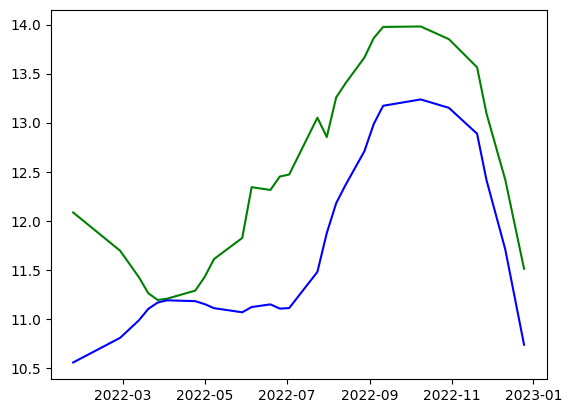

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(results['Casos'], 20, 3)
yhat2 = savgol_filter(results['Predicciones'], 20, 3)
plt.plot(weathertestv2.index,yhat, color='green')
plt.plot(weathertestv2.index, yhat2,color='blue')
plt.show()

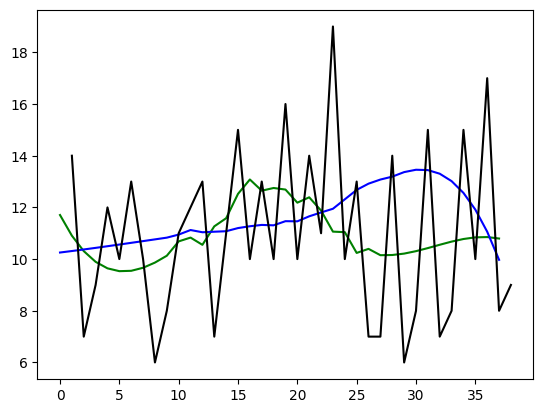

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(results['Casos'], 20, 3)
yhat2 = savgol_filter(results['Predicciones'], 20, 3)
plt.plot(results.index,yhat, color='green')
plt.plot(results.index, yhat2,color='blue')
plt.plot(weathertestv2.index, results['Casos'],color='black')
plt.show()

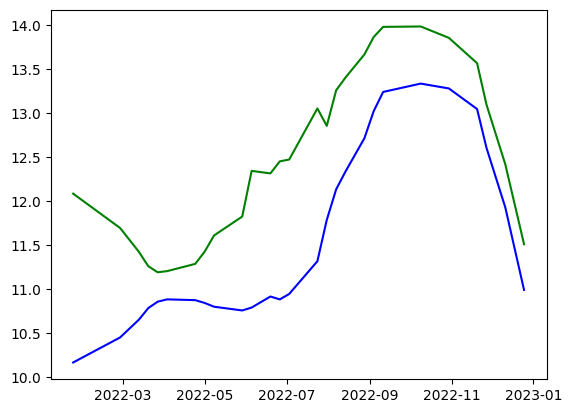

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(results['Casos'], 20, 3)
yhat2 = savgol_filter(results['Predicciones'], 20, 3)
plt.plot(weathertestv2.index,yhat, color='green')
plt.plot(weathertestv2.index, yhat2,color='blue')
plt.plot(weathertestv2.index, results['Casos'],color='black')
plt.show()

In [ ]:
import math
def smooth(scalars: list[float], weight: float) -> list[float]:
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    """
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed

<ipython-input-77-57e718c925da>:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


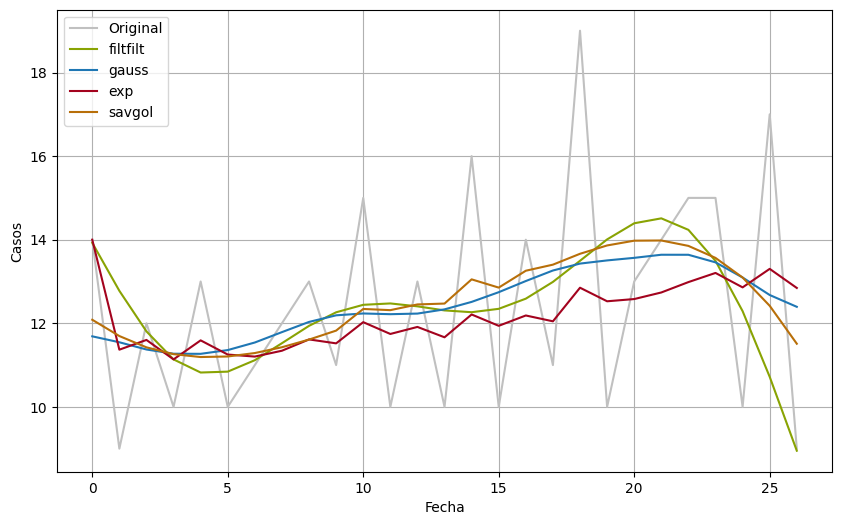

In [ ]:
from scipy import signal
#b, a = signal.butter(4, 0.03, analog=False)
from scipy.signal import savgol_filter
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(results['Casos'], sigma=2)

b, a = signal.ellip(4, 0.01, 120, 0.125)
sig_ff = signal.filtfilt(b, a, results['Casos'])
sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
yhat = savgol_filter(results['Casos'], 20, 3)
plt.figure(figsize=(10,6))
plt.plot(results['Casos'], color='silver', label='Original')
plt.plot(sig_ff, color='#89a303', label='filtfilt')
#plt.plot(sig_ff2, color='#07913a', label='pred')
#plt.plot(results['Predicciones'], color='#07913a', label='pred')
plt.plot(ysmoothed,label='gauss')
plt.plot(smooth(results['Casos'], .9),color='#a3031e',label='exp')
plt.plot(yhat,color='#b86f09',label='savgol')
plt.xlabel('Fecha'); plt.ylabel('Casos');
plt.grid(True, which='both')
plt.legend(loc="best")

<ipython-input-76-b02a57620eda>:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


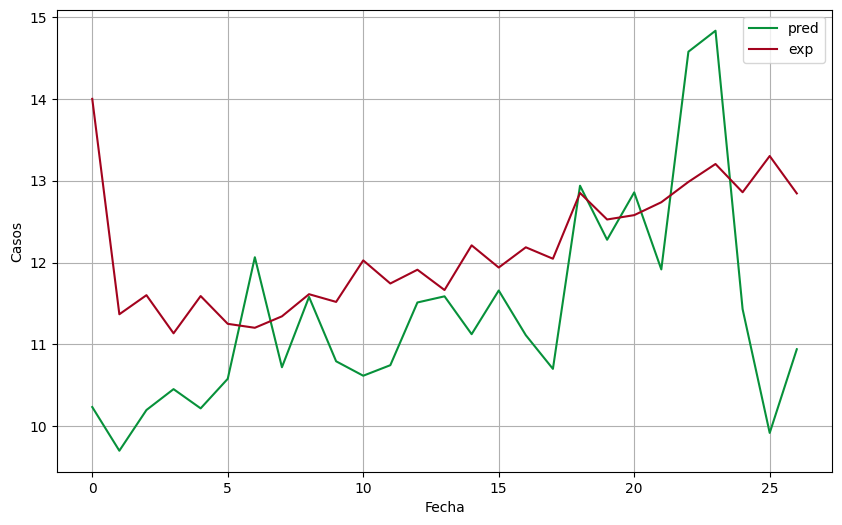

In [ ]:
from scipy import signal
#b, a = signal.butter(4, 0.03, analog=False)
from scipy.signal import savgol_filter
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(results['Casos'], sigma=2)

b, a = signal.ellip(4, 0.01, 120, 0.125)
sig_ff = signal.filtfilt(b, a, results['Casos'])
sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
yhat = savgol_filter(results['Casos'], 20, 3)
plt.figure(figsize=(10,6))
#plt.plot(results['Casos'], color='silver', label='Original')
#plt.plot(sig_ff, color='#89a303', label='filtfilt')
#plt.plot(sig_ff2, color='#07913a', label='pred')
plt.plot(results['Predicciones'], color='#07913a', label='pred')
#plt.plot(ysmoothed,label='gauss')
plt.plot(smooth(results['Casos'], .9),color='#a3031e',label='exp')
#plt.plot(yhat,color='#b86f09',label='savgol')
plt.xlabel('Fecha'); plt.ylabel('Casos');
plt.grid(True, which='both')
plt.legend(loc="best")

<ipython-input-75-220ad1ae419d>:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


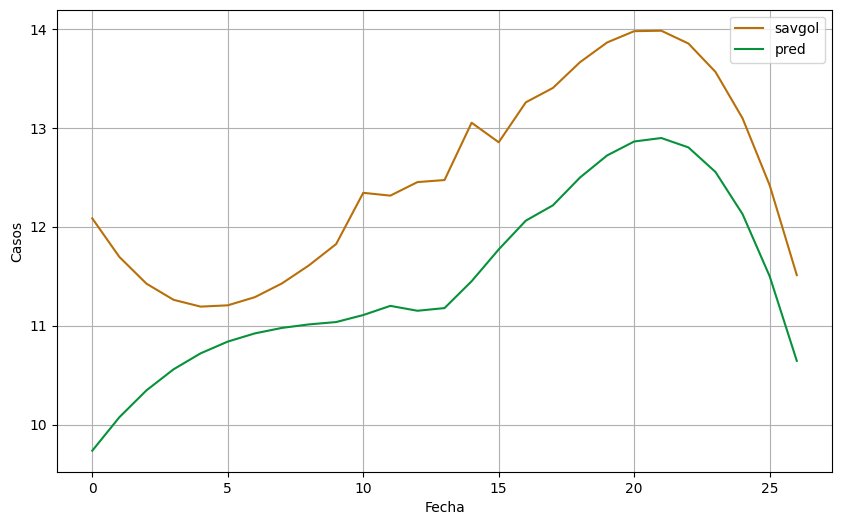

In [ ]:
from scipy import signal
#b, a = signal.butter(4, 0.03, analog=False)
from scipy.signal import savgol_filter
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(results['Casos'], sigma=2)

b, a = signal.ellip(4, 0.01, 120, 0.125)
sig_ff = signal.filtfilt(b, a, results['Casos'])
sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
yhat = savgol_filter(results['Casos'], 20, 3)
yhat2 = savgol_filter(results['Predicciones'], 20, 3)
plt.figure(figsize=(10,6))
#plt.plot(results['Casos'], color='silver', label='Original')
#plt.plot(sig_ff, color='#89a303', label='filtfilt')
#plt.plot(sig_ff2, color='#07913a', label='pred')
#plt.plot(smooth(results['Predicciones'],.9), color='#07913a', label='pred')
#plt.plot(ysmoothed,label='gauss')
#plt.plot(smooth(results['Casos'], .9),color='#a3031e',label='exp')
plt.plot(yhat,color='#b86f09',label='savgol')
plt.plot(yhat2,color='#07913a',label='pred')
plt.xlabel('Fecha'); plt.ylabel('Casos');
plt.grid(True, which='both')
plt.legend(loc="best")

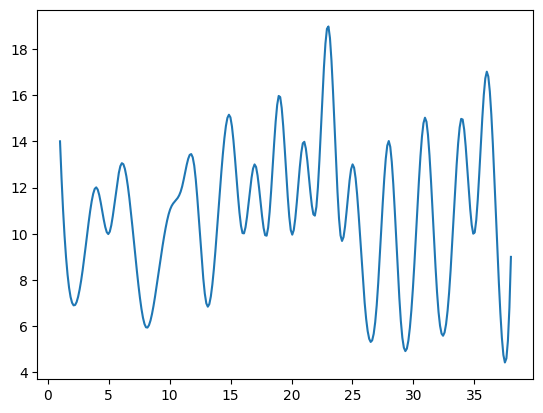

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(weathertestv2.index.min(), weathertestv2.index.max(), 300)

spl = make_interp_spline(weathertestv2.index, results['Casos'], k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

In [ ]:
import pickle
pickle.dump(rf, open('rf_model.pkl','wb'))

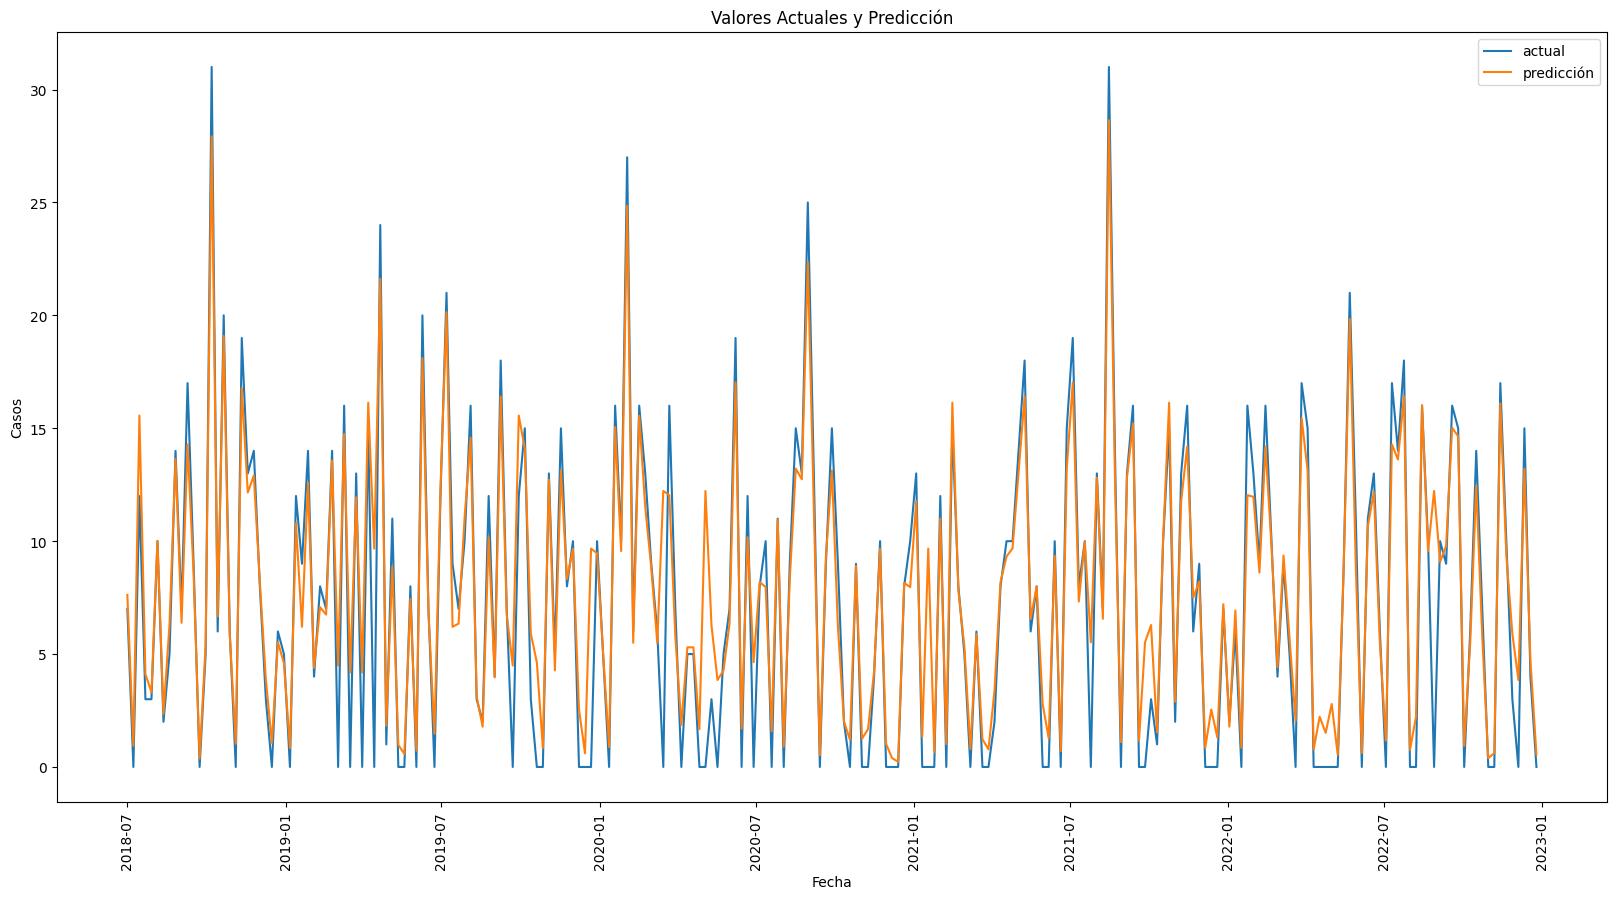

In [ ]:

# Plot the actual values
plt.figure(figsize=(20, 10))
plt.plot(weather.index[-235:], test_labels, label = 'actual')
# Plot the predicted values
plt.plot(weather.index[-235:], predictions, label = 'predicción')
plt.xticks(rotation = 'vertical');
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Casos'); plt.title('Valores Actuales y Predicción');

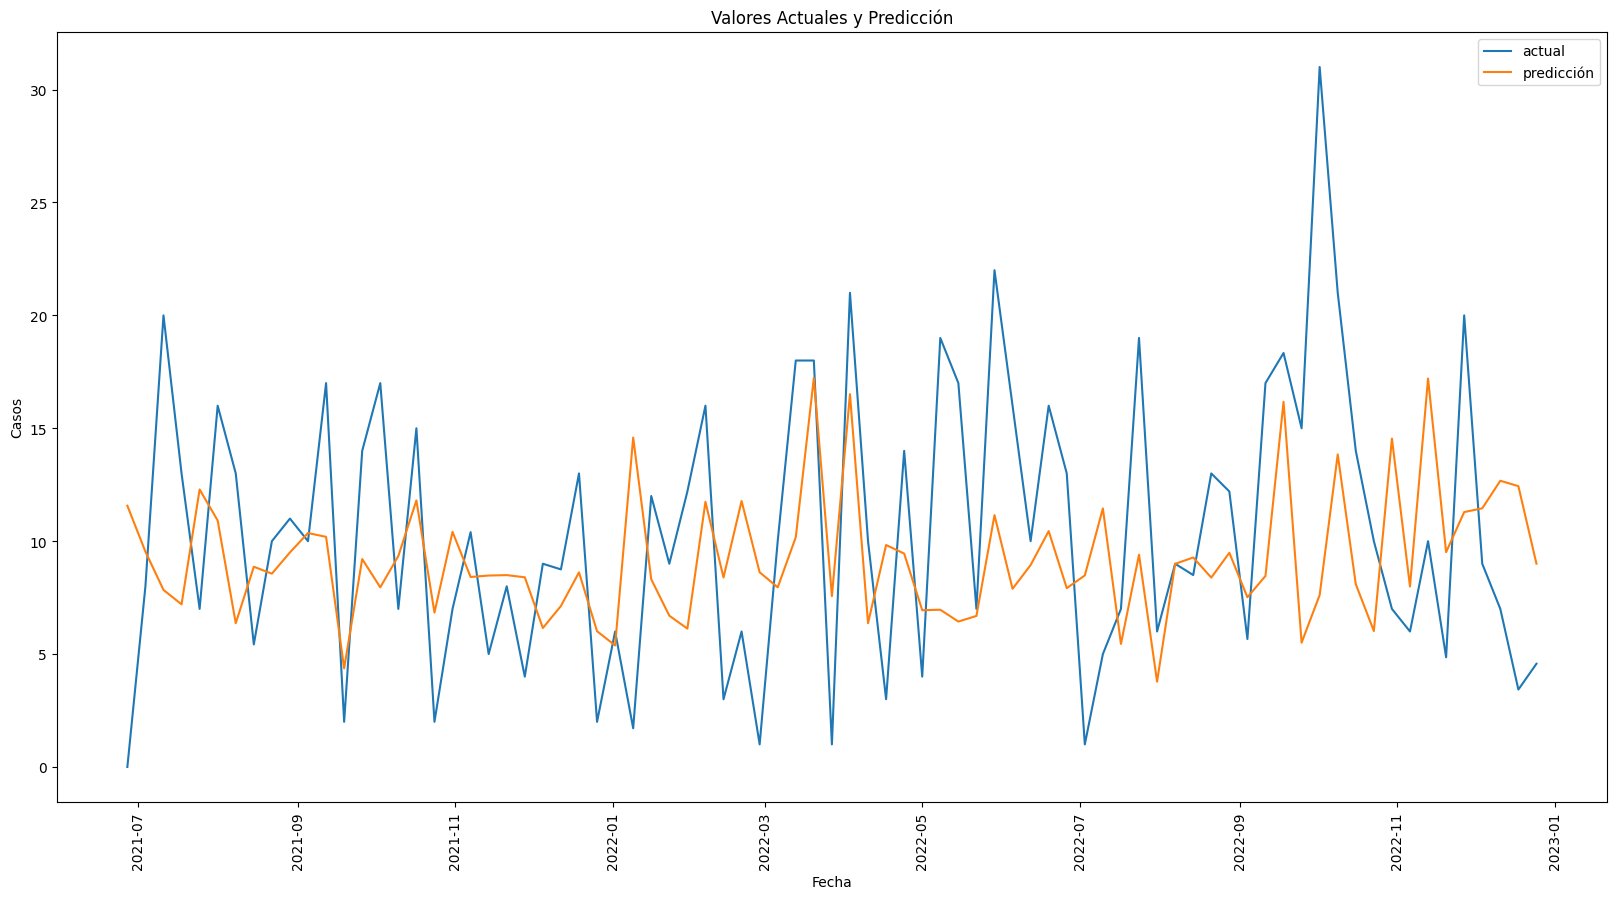

In [ ]:
# Plot the actual values
plt.figure(figsize=(20, 10))
plt.plot(weather.index[-79:], test_labels, label = 'actual')
# Plot the predicted values
plt.plot(weather.index[-79:], predictions, label = 'predicción')
plt.xticks(rotation = 'vertical');
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Casos'); plt.title('Valores Actuales y Predicción');

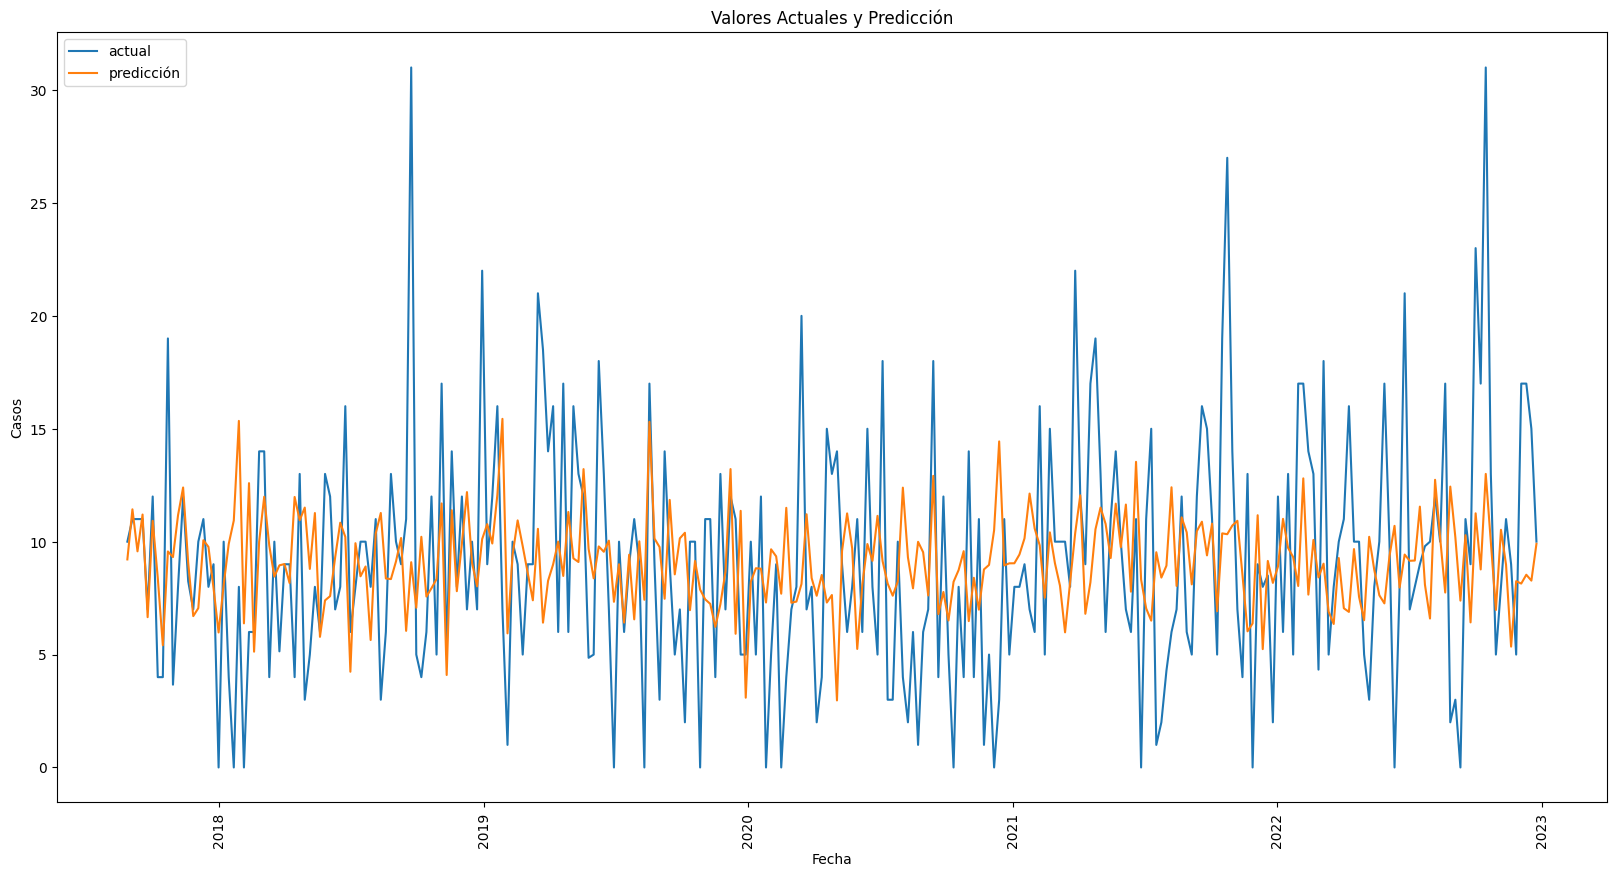

In [ ]:
# Plot the actual values
plt.figure(figsize=(20, 10))
plt.plot(test.index[-279:], test_labels, label = 'actual')
# Plot the predicted values
plt.plot(test.index[-279:], predictions, label = 'predicción')
plt.xticks(rotation = 'vertical');
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Casos'); plt.title('Valores Actuales y Predicción');

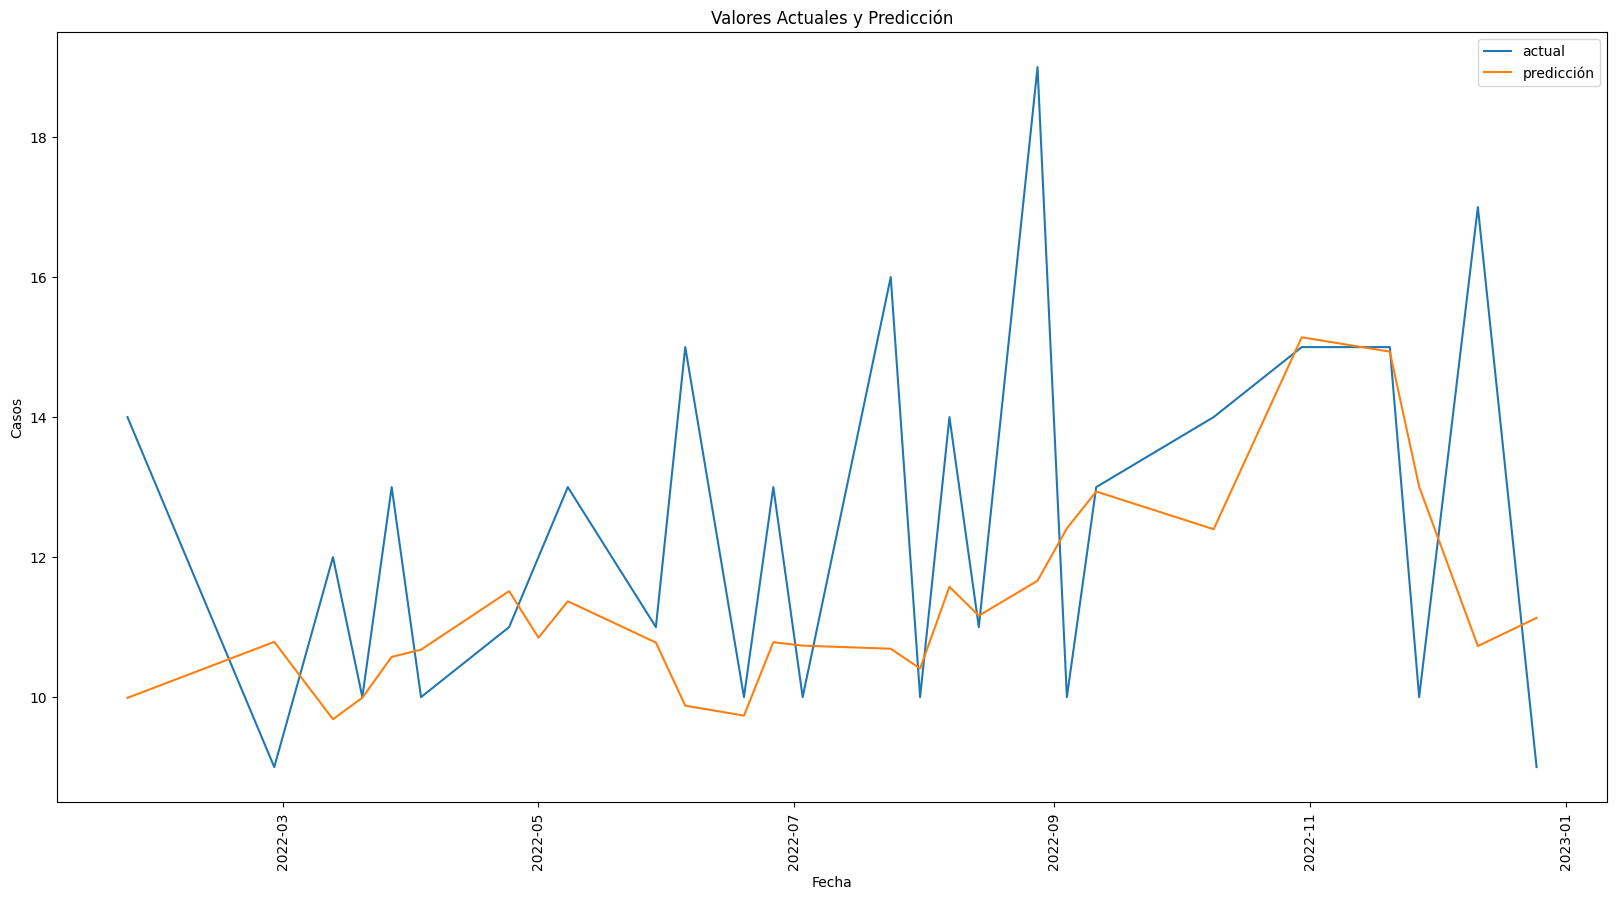

In [ ]:
# Plot the actual values
plt.figure(figsize=(20, 10))
plt.plot(weathertestv2.index, results['Casos'], label = 'actual')
# Plot the predicted values
plt.plot(weathertestv2.index, results['Predicciones'], label = 'predicción')
plt.xticks(rotation = 'vertical');
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Casos'); plt.title('Valores Actuales y Predicción');

#PREDICTION

In [ ]:
!gdown --id 1NU59a_FNtEhmYeSfkxxmEc4tI9bhl9h0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NU59a_FNtEhmYeSfkxxmEc4tI9bhl9h0
To: /content/weather2023.csv
100% 95.0k/95.0k [00:00<00:00, 85.4MB/s]


In [ ]:
pred=pd.read_csv('/content/weather2023.csv')
pred

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2023/01/01,00:00,17.8,0.0,95,128,0.0
1,2023/01/01,01:00,17.9,0.0,95,92,0.0
2,2023/01/01,04:00,17.9,0.0,95,90,0.0
3,2023/01/01,05:00,18.1,0.0,94,302,0.0
4,2023/01/01,07:00,18.8,0.0,91,343,0.0
...,...,...,...,...,...,...,...
2504,2023/04/30,19:00,25.7,0.0,59,254,0.2
2505,2023/04/30,20:00,24.7,0.0,62,298,0.4
2506,2023/04/30,21:00,24.1,0.0,63,315,0.0
2507,2023/04/30,22:00,23.3,0.0,69,34,0.0


In [ ]:
pred.rename(columns = {'AÑO / MES / DÍA':'DATE','TEMPERATURA (°C)':'Temperatura', 'PRECIPITACIÓN (mm/hora)':'Precipitacion','DIRECCION DEL VIENTO (°)':'Direccion_Viento',
                     'VELOCIDAD DEL VIENTO (m/s)':'Velocidad_Viento','HUMEDAD (%)':'Humedad'}, inplace = True)

In [ ]:
pred['Precipitacion'] = pd.to_numeric(pred['Precipitacion'], errors='coerce').astype('float')
pred['Temperatura']= pd.to_numeric(pred['Temperatura'], errors='coerce').astype('float')
pred['Humedad']= pd.to_numeric(pred['Humedad'], errors='coerce').astype('float')
pred['Direccion_Viento']= pd.to_numeric(pred['Direccion_Viento'], errors='coerce').astype('float')
pred['Velocidad_Viento']= pd.to_numeric(pred['Velocidad_Viento'], errors='coerce').astype('float')

In [ ]:
pred['Dates']=pred['DATE']+ ' ' + pred['HORA']
pred=pred.drop(columns=['DATE', 'HORA'])
pred.set_index('Dates',inplace=True)
pred.index = pd.to_datetime(pred.index)
pred

,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
Dates,,,,,
2023-01-01 00:00:00,17.8,0.0,95.0,128.0,0.0
2023-01-01 01:00:00,17.9,0.0,95.0,92.0,0.0
2023-01-01 04:00:00,17.9,0.0,95.0,90.0,0.0
2023-01-01 05:00:00,18.1,0.0,94.0,302.0,0.0
2023-01-01 07:00:00,18.8,0.0,91.0,343.0,0.0
...,...,...,...,...,...
2023-04-30 19:00:00,25.7,0.0,59.0,254.0,0.2
2023-04-30 20:00:00,24.7,0.0,62.0,298.0,0.4
2023-04-30 21:00:00,24.1,0.0,63.0,315.0,0.0


In [ ]:
start = pred.index[0].date()
end = pred.index[len(pred)-1]
newdates = pd.date_range(start=start,end=end,freq='H')

In [ ]:
pred = pred.reindex(newdates)
pred = pred.rename_axis('Dates')
pred

,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
Dates,,,,,
2023-01-01 00:00:00,17.8,0.0,95.0,128.0,0.0
2023-01-01 01:00:00,17.9,0.0,95.0,92.0,0.0
2023-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2023-01-01 04:00:00,17.9,0.0,95.0,90.0,0.0
...,...,...,...,...,...
2023-04-30 19:00:00,25.7,0.0,59.0,254.0,0.2
2023-04-30 20:00:00,24.7,0.0,62.0,298.0,0.4
2023-04-30 21:00:00,24.1,0.0,63.0,315.0,0.0


In [ ]:
pred= pred.interpolate(method='linear')

In [ ]:
pred=pred.loc[(pred.index >= '2023-01-01 00:00:00') & (pred.index <= '2023-04-16 23:00:00')]
pred

,Temperatura,Precipitacion,Humedad,Direccion_Viento,Velocidad_Viento
Dates,,,,,
2023-01-01 00:00:00,17.8,0.0,95.0,128.000000,0.0
2023-01-01 01:00:00,17.9,0.0,95.0,92.000000,0.0
2023-01-01 02:00:00,17.9,0.0,95.0,91.333333,0.0
2023-01-01 03:00:00,17.9,0.0,95.0,90.666667,0.0
2023-01-01 04:00:00,17.9,0.0,95.0,90.000000,0.0
...,...,...,...,...,...
2023-04-16 19:00:00,23.1,0.0,74.0,292.000000,0.2
2023-04-16 20:00:00,22.6,0.0,73.0,61.000000,0.0
2023-04-16 21:00:00,20.6,0.0,88.0,8.000000,0.0


In [ ]:
weather_pred=pred.resample('D')['Temperatura','Humedad','Direccion_Viento','Velocidad_Viento'].agg(['min', 'max','mean'])

In [ ]:
rain_pred=pred.resample('D')['Precipitacion'].agg(['sum'])

In [ ]:
weather_pred['Precipitacion']=rain_pred['sum'].values

In [ ]:
pred_final= weather_pred.resample('W').mean()

In [ ]:
pred_final=pred_final.drop(['Direccion_Viento','Velocidad_Viento'],axis=1)
pred_final

Temperatura                          Humedad                        \
                   min        max       mean        min        max       mean   
Dates                                                                           
2023-01-01   17.800000  30.100000  22.208333  43.000000  95.000000  76.729167   
2023-01-08   17.728571  27.357143  21.813095  52.000000  96.000000  75.949405   
2023-01-15   18.460714  29.228571  22.878869  46.571429  95.142857  73.151786   
2023-01-22   17.500000  29.828571  22.428571  43.857143  96.571429  74.595238   
2023-01-29   18.028571  29.100000  22.529464  44.857143  95.571429  73.854167   
2023-02-05   17.714286  27.242857  21.272917  52.571429  97.857143  80.383929   
2023-02-12   18.085714  29.285714  22.224405  46.428571  97.428571  78.668155   
2023-02-19   17.928571  27.414286  21.566667  55.714286  98.000000  81.531250   
2023-02-26   17.942857  29.771429  22.603869  44.571429  96.714286  73.886905   
2023-03-05   18.864286  29.857143  23.124107  47.142857  95.142857  75.523810   
2023-03-12   17.942857  29.285714  22.491071  48.714286  96.428571  77.238095   
2023-03-19   17.885714  28.300000  21.611905  48.285714  97.285714  79.446429   
2023-03-26   17.614286  27.385714  21.099405  53.285714  97.714286  82.729167   
2023-04-02   18.171429  28.271429  22.063095  52.571429  97.857143  81.083333   
2023-04-09   17.842857  28.300000  21.786607  49.857143  96.857143  78.678571   
2023-04-16   18.157143  28.971429  22.158036  48.428571  96.571429  78.800595   

           Precipitacion  
                          
Dates                     
2023-01-01      0.700000  
2023-01-08      3.171429  
2023-01-15      2.542857  
2023-01-22      3.764286  
2023-01-29      2.585714  
2023-02-05     12.035714  
2023-02-12      6.478571  
2023-02-19      3.735714  
2023-02-26      1.228571  
2023-03-05      3.707143  
2023-03-12      2.564286  
2023-03-19      5.221429  
2023-03-26      6.950000  
2023-04-02      9.542857  
2023-04-09      5.057143  
2023-04-16      2.821429

In [ ]:
pred_numpy=pred_final.to_numpy()

In [ ]:
preds_ahead = rf.predict(pred_numpy)
preds_ahead

array([10.62593917, 10.90278412, 11.18723413, 10.256551  , 10.71555075,
        9.99172348, 10.12257483, 10.0141221 , 11.20538936, 11.37762745,
       10.29583723, 10.25692875, 10.1410858 , 10.33267401, 10.60609178,
       10.33331207])

In [ ]:
preds_ahead[:8]

array([10.62593917, 10.90278412, 11.18723413, 10.256551  , 10.71555075,
        9.99172348, 10.12257483, 10.0141221 ])

In [ ]:
weather_chart=weathertest[weathertest['casos']>5]

In [ ]:
weathertest

In [ ]:
from scipy import signal
b, a = signal.ellip(4, 0.01, 120, 0.125)
sig_ff = signal.filtfilt(b, a, weather_chart['casos'])

In [ ]:
smooth=pd.DataFrame(sig_ff,columns=['casos'])
smooth.set_index(weather_chart.index,inplace=True)
smooth.index = pd.to_datetime(smooth.index)

In [ ]:
pred_chart=pd.DataFrame(preds_ahead,columns=['predicciones'])
pred_chart.set_index(pred_final.index,inplace=True)
pred_chart.index = pd.to_datetime(pred_chart.index)

In [ ]:
last_case=smooth[-1:]
last_case.rename(columns = {'casos':'predicciones'}, inplace = True)

<ipython-input-53-eea8abf042ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_case.rename(columns = {'casos':'predicciones'}, inplace = True)


In [ ]:
final_pred_chart=pd.concat([last_case,pred_chart])

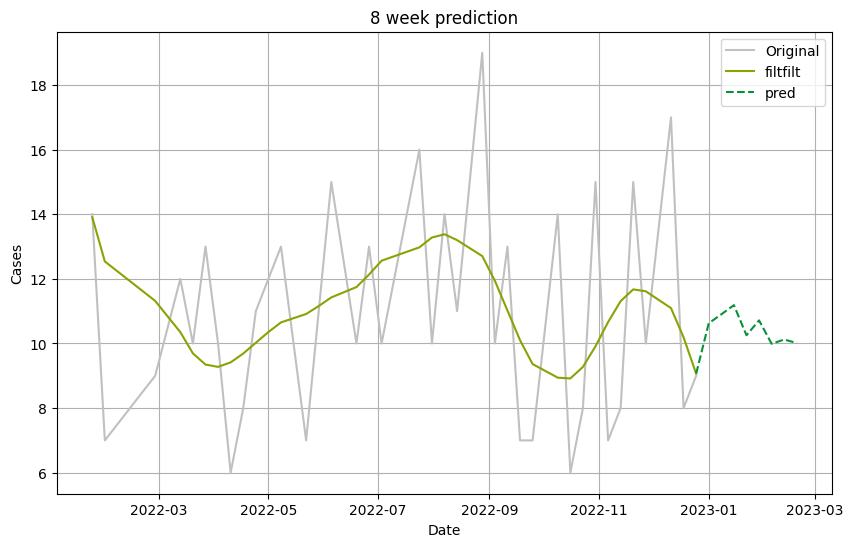

In [ ]:
#sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
plt.figure(figsize=(10,6))
plt.plot(weather_chart['casos'], color='silver', label='Original')
plt.plot(smooth['casos'], color='#89a303', label='filtfilt')
plt.plot(final_pred_chart['predicciones'], color='#07913a', label='pred',linestyle='--')
plt.xlabel('Date'); plt.ylabel('Cases');plt.title('8 week prediction');
plt.grid(True, which='both')
plt.legend(loc="best")

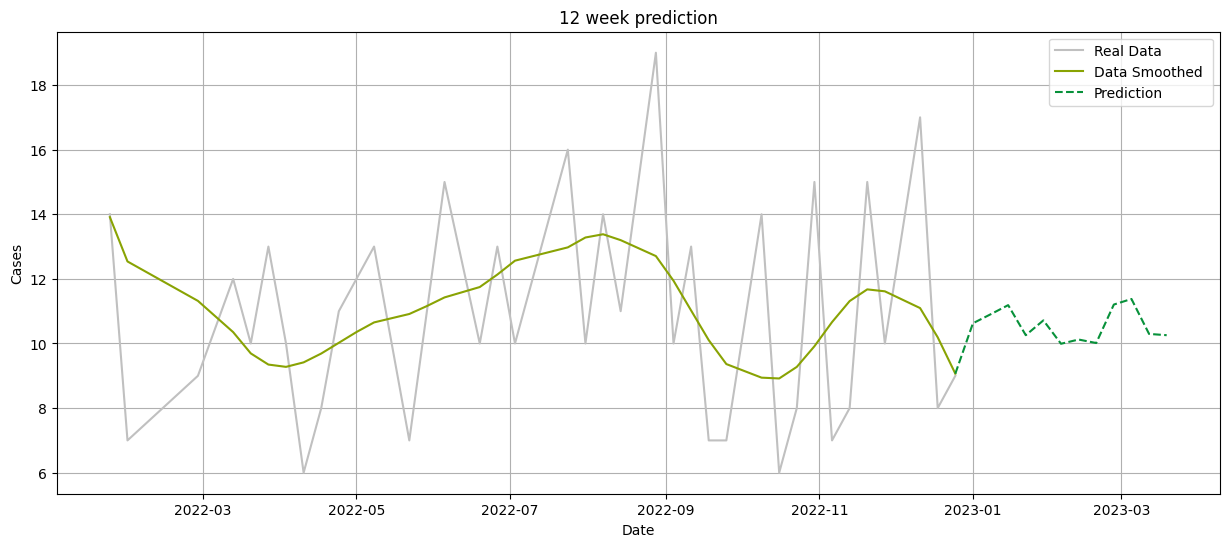

In [ ]:
#sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
plt.figure(figsize=(15,6))
plt.plot(weather_chart['casos'], color='silver', label='Real Data')
plt.plot(smooth['casos'], color='#89a303', label='Data Smoothed ')
plt.plot(final_pred_chart['predicciones'], color='#07913a', label='Prediction',linestyle='--')
plt.xlabel('Date'); plt.ylabel('Cases');plt.title('12 week prediction');
plt.grid(True, which='both')
plt.legend(loc="best")

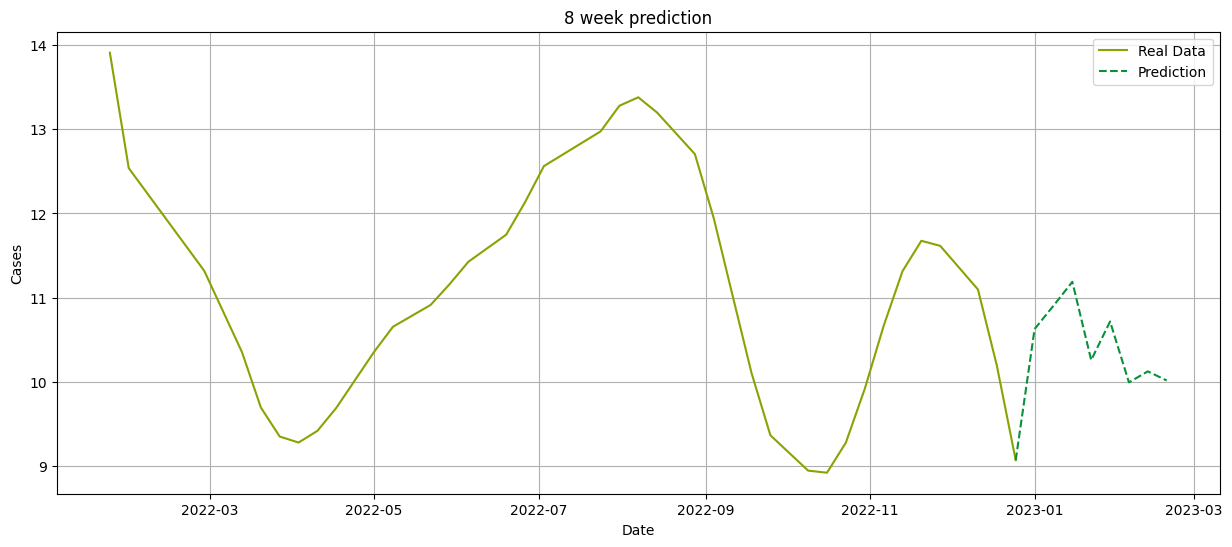

In [ ]:
#sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
plt.figure(figsize=(15,6))
#plt.plot(weather_chart['casos'], color='silver', label='Real Data')
plt.plot(smooth['casos'], color='#89a303', label='Real Data')
plt.plot(final_pred_chart['predicciones'][:9], color='#07913a', label='Prediction',linestyle='--')
plt.xlabel('Date'); plt.ylabel('Cases');plt.title('8 week prediction');
plt.grid(True, which='both')
plt.legend(loc="best")

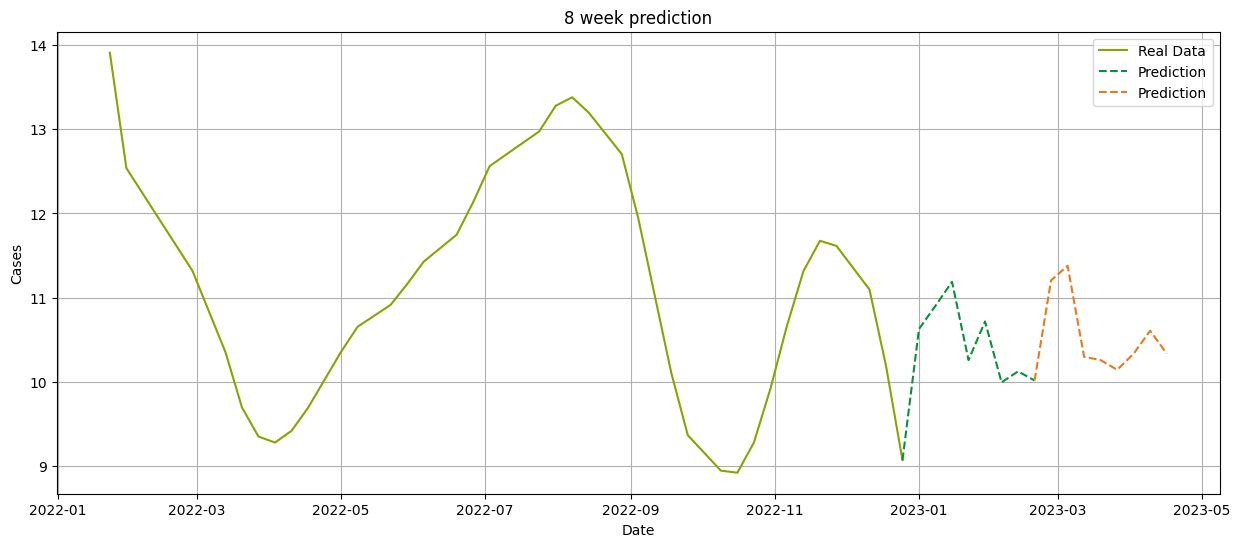

In [ ]:
#sig_ff2 = signal.filtfilt(b, a, results['Predicciones'])
plt.figure(figsize=(15,6))
#plt.plot(weather_chart['casos'], color='silver', label='Real Data')
plt.plot(smooth['casos'], color='#89a303', label='Real Data')
plt.plot(final_pred_chart['predicciones'][:9], color='#07913a', label='Prediction',linestyle='--')
plt.plot(final_pred_chart['predicciones'][-9:], color='#e67a1c', label='Prediction',linestyle='--')
plt.xlabel('Date'); plt.ylabel('Cases');plt.title('8 week prediction');
plt.grid(True, which='both')
plt.legend(loc="best")